# Taller de Algoritmos de Búsqueda

Este cuaderno sirve como base para el desarrollo del taller propuesto en la Maestría en Inteligencia Artificial. Contiene estructuras, grafos y algoritmos de búsqueda para resolver los ejercicios planteados.

# Paula Pirela y Gustavo Jerez

##Universidad EAFIT
##Maestria en Ciencia de Datos y Analitica
##2025 - II

## Estructuras Base

In [ ]:
# Librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue, Queue, LifoQueue
import time

# Nodo básico para búsqueda
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        # La profundidad es el número de pasos desde el nodo raíz
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __lt__(self, other):
        return self.path_cost < other.path_cost

    def solution(self):
        path, node = [], self
        while node:
            path.append(node.state)
            node = node.parent
        return list(reversed(path))

### **Ejercicio 1: Optimización de rutas rurales (Logística)**

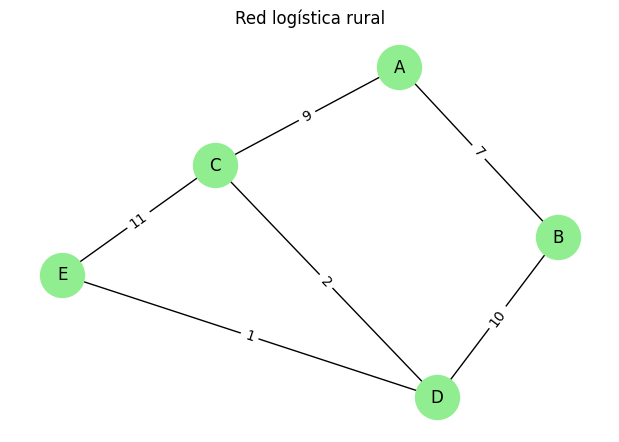

In [ ]:
# Grafo de ejemplo para logística
G1 = nx.Graph()
edges1 = [('A', 'B', 7), ('A', 'C', 9), ('B', 'D', 10), ('C', 'D', 2), ('C', 'E', 11), ('D', 'E', 1)]
G1.add_weighted_edges_from(edges1)

# Visualización
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, with_labels=True, node_color='lightgreen', node_size=1000)
labels = nx.get_edge_attributes(G1, 'weight')
nx.draw_networkx_edge_labels(G1, pos, edge_labels=labels)
plt.title("Red logística rural")
plt.show()

###**1. Analisis problema**

El problema es un caso clásico de optimización de rutas. El objetivo no es simplemente encontrar cualquier camino entre un origen y un destino, sino encontrar el camino de costo mínimo.


###**2. Tipo busqueda empleada**

El tipo de búsqueda empleada fue una búsqueda informada (o heurística), específicamente el algoritmo A* . Se clasifica como "informada" porque, a diferencia de las búsquedas "a ciegas" (como BFS o IDS), A* utiliza información adicional para tomar decisiones más inteligentes y eficientes. Esta información se introduce a través de una función heurística.

### **3. Metrica de distancia utilizada**

Se utilizaron dos métricas combinadas por el algoritmo A*:

*   Costo Real (g(n)): Esta es la métrica principal. Corresponde a la suma de los pesos de las aristas a lo largo de una ruta. En el grafo, estos eran los números asignados a cada conexión (ej. 7, 9, 2), que representan el costo real (distancia, tiempo, etc.) de viajar por ese tramo.
*   Costo Estimado o Heurística (h(n)): Para guiar la búsqueda de manera eficiente, se usó la distancia euclidiana como una métrica de estimación. Esta es la distancia en línea recta entre un nodo y el destino, calculada a partir de las coordenadas (x, y) que se asignaron a cada punto.

A* no usa una sola métrica, sino que combina el costo real del camino ya recorrido con una estimación del costo que falta por recorrer para tomar la decisión más inteligente en cada paso.

###**4. Implementación del código para búsqueda de A***

In [ ]:
import math # Necesario para la heurística euclidiana

In [ ]:
# --- 1. DEFINICIÓN DEL GRAFO Y COORDENADAS ---
# Grafo de ejemplo para logística rural
G1 = nx.Graph()
edges1 = [('A', 'B', 7), ('A', 'C', 9), ('B', 'D', 10), ('C', 'D', 2), ('C', 'E', 11), ('D', 'E', 1)]
G1.add_weighted_edges_from(edges1)

# Asignamos coordenadas a cada nodo para poder calcular la distancia euclidiana.
# NOTA: Estas posiciones son inventadas para el ejercicio.
pos = {'A': (0, 5), 'B': (4, 8), 'C': (3, 2), 'D': (4, 1), 'E': (5, 0)}

In [ ]:
# --- 2. FUNCIÓN HEURÍSTICA ---
# Heurística euclidiana: distancia en línea recta entre dos puntos.
def euclidean_heuristic(node_state, goal_state, positions):
    """Calcula la distancia euclidiana entre el estado de un nodo y el objetivo."""
    x1, y1 = positions[node_state]
    x2, y2 = positions[goal_state]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [ ]:
# --- 3. ALGORITMO A* (MODIFICADO PARA DEVOLVER MÉTRICAS) ---
def a_star_search_with_metrics(graph, start_state, goal_state, heuristic_func, positions):
    """
    Encuentra la ruta óptima usando A* y devuelve métricas de desempeño.
    """
    # Métricas a registrar
    nodes_expanded = 0

    start_node = Node(state=start_state, path_cost=0)
    frontier = PriorityQueue()
    initial_f_cost = start_node.path_cost + heuristic_func(start_state, goal_state, positions)
    frontier.put((initial_f_cost, start_node))
    explored = set()

    while not frontier.empty():
        current_f_cost, current_node = frontier.get()

        if current_node.state in explored:
            continue

        # Un nodo se considera "expandido" cuando es seleccionado para explorar sus vecinos.
        nodes_expanded += 1
        explored.add(current_node.state)

        if current_node.state == goal_state:
            # Si encontramos la solución, empaquetamos los resultados
            solution_path = current_node.solution()
            metrics = {
                "nodes_expanded": nodes_expanded,
                "path_cost": current_node.path_cost,
                "path_depth": current_node.depth
            }
            return solution_path, metrics

        for neighbor, data in graph[current_node.state].items():
            if neighbor not in explored:
                new_cost = current_node.path_cost + data['weight']
                new_node = Node(state=neighbor, parent=current_node, path_cost=new_cost)
                f_cost = new_node.path_cost + heuristic_func(neighbor, goal_state, positions)
                frontier.put((f_cost, new_node))

    # Si no hay solución
    return None, {"nodes_expanded": nodes_expanded, "path_cost": -1, "path_depth": -1}

In [ ]:
# --- 4. EJECUCIÓN Y PRESENTACIÓN DE MÉTRICAS ---
start_node_id = 'A'
goal_node_id = 'E'

# Medir tiempo de ejecución
t_start = time.perf_counter()
optimal_path, performance_metrics = a_star_search_with_metrics(
    G1, start_node_id, goal_node_id, euclidean_heuristic, pos
)
t_end = time.perf_counter()

# Añadir el tiempo de ejecución a las métricas
performance_metrics["execution_time_sec"] = t_end - t_start

# Imprimir resultados y métricas
print("--- Resultados de la Búsqueda A* ---")
if optimal_path:
    print(f"Ruta óptima encontrada: {' -> '.join(optimal_path)}\n")
    print("--- Métricas de Desempeño ---")
    print(f"1. Tiempo de ejecución: {performance_metrics['execution_time_sec']:.6f} segundos")
    print(f"2. Costo total del camino: {performance_metrics['path_cost']}")
    print(f"3. Número de nodos expandidos: {performance_metrics['nodes_expanded']}")
    print(f"4. Profundidad alcanzada: {performance_metrics['path_depth']} niveles")
else:
    print("No se encontró una ruta al destino.")

--- Resultados de la Búsqueda A* ---
Ruta óptima encontrada: A -> C -> D -> E

--- Métricas de Desempeño ---
1. Tiempo de ejecución: 0.000770 segundos
2. Costo total del camino: 12
3. Número de nodos expandidos: 4
4. Profundidad alcanzada: 3 niveles


###**5. Metricas de desempeño**

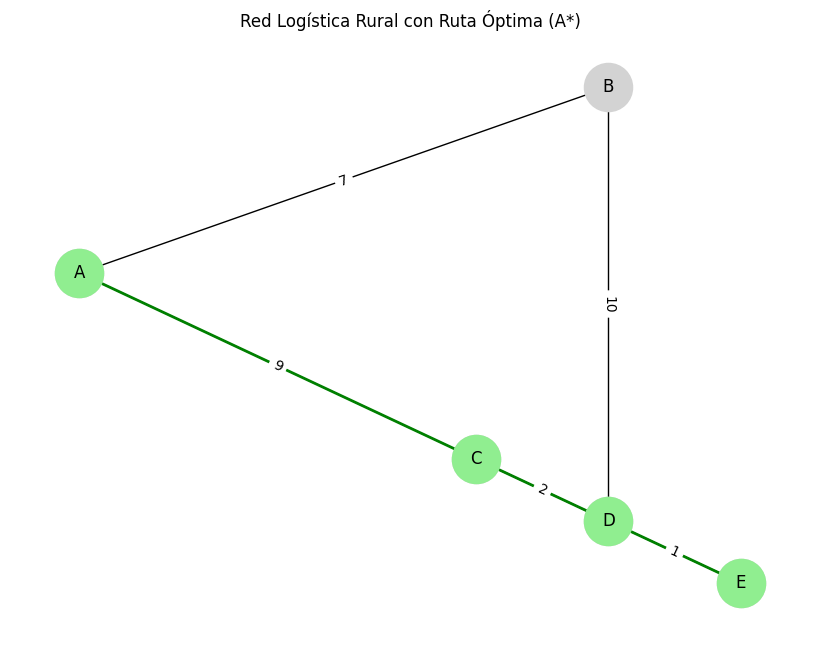

In [ ]:
# --- 5. EJECUCIÓN Y VISUALIZACIÓN ---
# Visualización del grafo y la ruta óptima
plt.figure(figsize=(8, 6))
nx.draw(G1, pos, with_labels=True, node_color='lightgray', node_size=1200, font_size=12)

# Resaltamos la ruta óptima
path_edges = list(zip(optimal_path, optimal_path[1:]))
nx.draw_networkx_nodes(G1, pos, nodelist=optimal_path, node_color='lightgreen', node_size=1200)
nx.draw_networkx_edges(G1, pos, edgelist=path_edges, edge_color='green', width=2)

# Mostramos las etiquetas de los pesos
edge_labels = nx.get_edge_attributes(G1, 'weight')
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)
plt.title("Red Logística Rural con Ruta Óptima (A*)")
plt.show()


### **6. Evaluación de la complejidad computacional (temporal y espacial).**

In [ ]:
import random
import tracemalloc  # Para medir el uso de memoria

In [ ]:
# --- 6. FUNCIÓN PARA GENERAR PROBLEMAS ---
def generate_problem(num_nodes, edge_factor=1.5):
    """
    Genera un grafo aleatorio conectado con pesos y coordenadas para los nodos.
    """
    num_edges = int(num_nodes * edge_factor)
    graph = nx.gnm_random_graph(num_nodes, num_edges, seed=random.randint(0, 1000))

    # Asegurarse de que el grafo sea conexo
    if not nx.is_connected(graph):
        # Conecta los componentes si no lo está
        components = list(nx.connected_components(graph))
        for i in range(len(components) - 1):
            node1 = random.choice(list(components[i]))
            node2 = random.choice(list(components[i+1]))
            graph.add_edge(node1, node2)

    positions = {i: (random.uniform(0, 100), random.uniform(0, 100)) for i in range(num_nodes)}
    for (u, v) in graph.edges():
        graph.edges[u, v]['weight'] = random.uniform(1, 10)

    start_node = 0
    goal_node = num_nodes - 1

    return graph, positions, start_node, goal_node

In [ ]:
# --- 7. LÓGICA DEL EXPERIMENTO ---
node_sizes = range(20, 301, 20)  # Probamos con grafos de 20 a 300 nodos
results = []

print("Iniciando análisis experimental de A*...")

for size in node_sizes:
    G, pos, start, goal = generate_problem(size)

    # Medir memoria
    tracemalloc.start()

    # Medir tiempo
    t_start = time.perf_counter()

    path, metrics = a_star_search_with_metrics(G, start, goal, euclidean_heuristic, pos)

    t_end = time.perf_counter()
    current_mem, peak_mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Guardar todos los resultados de esta iteración
    metrics['execution_time'] = t_end - t_start
    metrics['peak_memory_kb'] = peak_mem / 1024
    metrics['num_nodes'] = size
    results.append(metrics)

    print(f"Grafo de {size} nodos completado. Tiempo: {metrics['execution_time']:.4f}s. Memoria: {metrics['peak_memory_kb']:.2f} KB.")

Iniciando análisis experimental de A*...
Grafo de 20 nodos completado. Tiempo: 0.0003s. Memoria: 4.38 KB.
Grafo de 40 nodos completado. Tiempo: 0.0003s. Memoria: 4.75 KB.
Grafo de 60 nodos completado. Tiempo: 0.0011s. Memoria: 9.38 KB.
Grafo de 80 nodos completado. Tiempo: 0.0012s. Memoria: 12.58 KB.
Grafo de 100 nodos completado. Tiempo: 0.0046s. Memoria: 20.20 KB.
Grafo de 120 nodos completado. Tiempo: 0.0003s. Memoria: 5.19 KB.
Grafo de 140 nodos completado. Tiempo: 0.0033s. Memoria: 32.30 KB.
Grafo de 160 nodos completado. Tiempo: 0.0003s. Memoria: 4.72 KB.
Grafo de 180 nodos completado. Tiempo: 0.0041s. Memoria: 20.42 KB.
Grafo de 200 nodos completado. Tiempo: 0.0042s. Memoria: 21.95 KB.
Grafo de 220 nodos completado. Tiempo: 0.0007s. Memoria: 6.12 KB.
Grafo de 240 nodos completado. Tiempo: 0.0016s. Memoria: 11.75 KB.
Grafo de 260 nodos completado. Tiempo: 0.0138s. Memoria: 56.41 KB.
Grafo de 280 nodos completado. Tiempo: 0.0027s. Memoria: 17.71 KB.
Grafo de 300 nodos completado. 

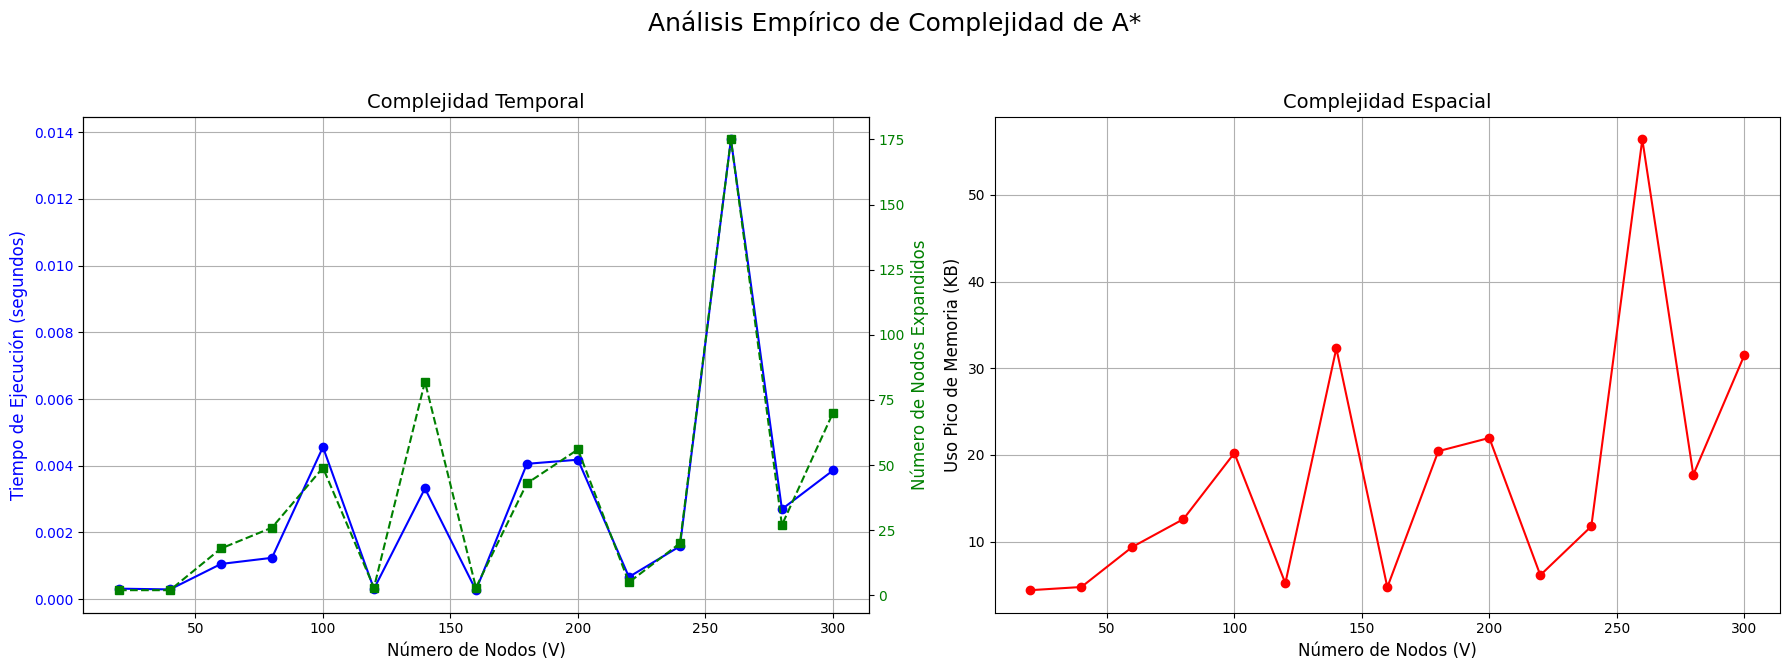

In [ ]:
# --- 8. VISUALIZACIÓN DE LOS RESULTADOS ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Análisis Empírico de Complejidad de A*', fontsize=18)

# Extraer datos para graficar
sizes = [r['num_nodes'] for r in results]
times = [r['execution_time'] for r in results]
nodes_exp = [r['nodes_expanded'] for r in results]
memory = [r['peak_memory_kb'] for r in results]

# Gráfico 1: Complejidad Temporal
ax1.plot(sizes, times, 'o-', color='blue', label='Tiempo de Ejecución')
ax1.set_xlabel('Número de Nodos (V)', fontsize=12)
ax1.set_ylabel('Tiempo de Ejecución (segundos)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Complejidad Temporal', fontsize=14)
ax1.grid(True)

# Eje Y secundario para nodos expandidos
ax1_twin = ax1.twinx()
ax1_twin.plot(sizes, nodes_exp, 's--', color='green', label='Nodos Expandidos')
ax1_twin.set_ylabel('Número de Nodos Expandidos', color='green', fontsize=12)
ax1_twin.tick_params(axis='y', labelcolor='green')

# Gráfico 2: Complejidad Espacial
ax2.plot(sizes, memory, 'o-', color='red', label='Uso Pico de Memoria')
ax2.set_xlabel('Número de Nodos (V)', fontsize=12)
ax2.set_ylabel('Uso Pico de Memoria (KB)', fontsize=12)
ax2.set_title('Complejidad Espacial', fontsize=14)
ax2.grid(True)

# Ajustar layout y mostrar
fig.tight_layout(rect=[0, 0.03, 1, 0.94])
plt.show()

### **7.Reflexion crıtica sobre eficiencia, aplicabilidad, y posibles mejoras**

Los gráficos muestran que, aunque el rendimiento general empeora a medida que la red crece (más tiempo y más memoria), el resultado es muy volátil. Esto se debe a que la topología aleatoria de cada grafo tiene un gran impacto. Un grafo grande puede ser "fácil" si la ruta es directa, mientras que uno más pequeño puede ser "difícil" y laberíntico.

A* es aplicable: Necesitas la ruta óptima garantizada en redes de tamaño moderado (cientos o miles de nodos) y dispones de una buena heurística (una forma de estimar la distancia restante), como en problemas de logística o videojuegos.

No es aplicable cuando: La red es masiva (como la red vial de un país), ya que su consumo de tiempo y memoria es demasiado alto para respuestas en tiempo real. Tampoco es ideal si solo necesitas cualquier ruta y no necesariamente la más barata.

Posibles Mejoras: Más inteligencia y mejores experimentos
Mejorar la Heurística: La forma más directa de acelerar A* es "enseñarle" mejor. Una heurística más precisa que la distancia euclidiana (que no considera obstáculos) reduciría drásticamente los nodos a explorar.

Algoritmos Avanzados: Para problemas a gran escala, A* se combina con otras técnicas. La búsqueda bidireccional (buscar desde el inicio y el fin a la vez) es una optimización clave. Para sistemas como Google Maps, se usan métodos de preprocesamiento como Contraction Hierarchies que crean "autopistas" en el grafo para acelerar las búsquedas.

Mejorar el Experimento: Para obtener una gráfica de tendencia clara, se deberían ejecutar múltiples pruebas para cada tamaño de grafo y promediar los resultados. Esto suavizaría el "ruido" y mostraría la verdadera curva de complejidad media.

### **Cuestionamientos**

**1. ¿Como afecta la calidad de la heurıstica a la solucion? ¿Es pertinente usar distancia euclidiana?**

La calidad de la heurística dicta el balance entre optimalidad y rendimiento.

Una heurística admisible (que no sobreestima el costo real, como la euclidiana) garantiza que A* encuentre la solución óptima. Cuanto más informada (cercana al costo real) sea la heurística, más eficientemente se poda el árbol de búsqueda, reduciendo el espacio de estados explorados y acelerando el cómputo.

Una heurística no admisible puede acelerar la búsqueda, pero sacrifica la garantía de optimalidad, pudiendo converger a una solución subóptima.

Pertinencia Euclidiana: Es una excelente línea base: es admisible, consistente y computacionalmente barata. Sin embargo, su limitación es que modela una distancia "as the crow flies", ignorando la topología real de la red (curvas, terreno, límites de velocidad). Para un modelo más robusto, se podría sustituir por heurísticas más sofisticadas como la distancia Manhattan o, idealmente, valores precalculados basados en datos históricos de viaje.

**2. ¿Qué tan flexible sería su modelo ante la inclusión de nuevas rutas, restricciones o cierres viales?**

La flexibilidad del modelo es muy alta, ya que la lógica del algoritmo A* es agnóstica a la estructura específica del grafo.

Adiciones (nuevas rutas): G.add_edge()

Eliminaciones (cierres viales): G.remove_edge()

Modificaciones (tráfico, restricciones): G[u][v]['weight'] = new_cost

Cualquier cambio se realiza directamente sobre la estructura de datos del grafo. El algoritmo no requiere ninguna modificación interna para adaptarse, lo que lo hace ideal para entornos dinámicos.

**3. ¿Que tanto escalarıa su solucion si el numero de nodos se multiplica por 10?**

Si la red de rutas se vuelve 10 veces más grande, el tiempo de cálculo para encontrar el camino óptimo crecerá mucho más de 10 veces. No es una relación lineal (1:1), sino supralineal. Una heurística de alta calidad es crítica para escalar. Al podar eficientemente el espacio de búsqueda, mantiene la base del exponente en la complejidad práctica lo más baja posible. Para grafos a gran escala (millones de nodos), A* por sí solo no es suficiente, y se requieren técnicas de preprocesamiento como Contraction Hierarchies (CH) o Hub Labeling para lograr tiempos de respuesta interactivos.

### **Ejercicio 2: Red de metro (Transporte)**

###**1. Analisis problema**

El problema consiste en encontrar una ruta válida entre dos puntos específicos (la estación 'A' y la 'J') dentro de una red de transporte público. El objetivo implícito, al tratarse de un sistema de metro, es encontrar la ruta con el menor número de paradas posible. Es un problema clásico de conectividad y búsqueda del camino más corto en su forma más fundamental, donde "más corto" se mide en número de saltos o aristas, no en distancia o tiempo.

###**2. Tipo de Búsqueda Empleada**

Se emplearon dos algoritmos de búsqueda no informada (o ciega), que son apropiados porque no se dispone de información adicional (como coordenadas o costos) para guiar la búsqueda de manera más "inteligente".

*   Búsqueda en Anchura (BFS - Breadth-First Search): Este algoritmo explora el grafo expandiéndose en "capas" o niveles. Es la elección óptima y natural para este problema, ya que en un grafo no ponderado, garantiza encontrar la ruta con el menor número de aristas.
*   Búsqueda en Profundidad Iterativa (IDS - Iterative Deepening Search): Se utilizó para fines comparativos. IDS combina la eficiencia de memoria de la búsqueda en profundidad (DFS) con la optimalidad de BFS. Al igual que BFS, encuentra la ruta más corta, pero lo hace realizando sucesivas búsquedas con límites de profundidad crecientes. Generalmente, es computacionalmente más costoso que BFS debido a la re-exploración de nodos en cada iteración.

###**3. Metrica de distancia utilizada**

En ese ejercicio, la métrica de distancia utilizada fue la longitud de la ruta o número de saltos. Como el grafo de la red de metro era no ponderado, no había una distancia numérica (como kilómetros o minutos) asociada a cada conexión. Por lo tanto, la "distancia" se mide simplemente por el conteo de las aristas que se deben recorrer para ir de una estación a otra.

###**4. Implementación del código para búsqueda de BFS e IDS***

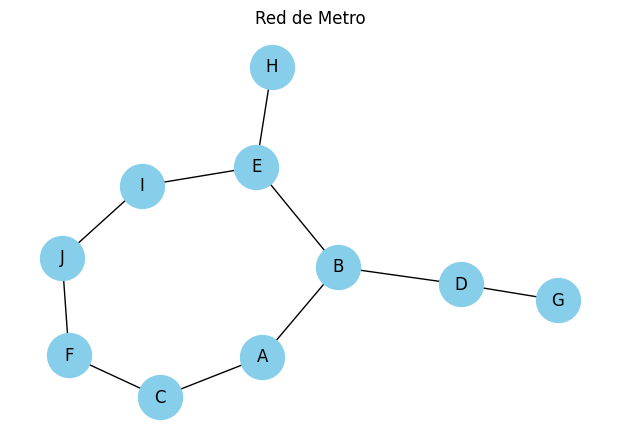

In [ ]:
# Grafo de red de metro
G2 = nx.Graph()
edges2 = [('A','B'), ('A','C'), ('B','D'), ('B','E'), ('C','F'), ('D','G'), ('E','H'), ('E','I'), ('F','J'), ('I','J')]
G2.add_edges_from(edges2)

# Visualización
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_color='skyblue', node_size=1000)
plt.title("Red de Metro")
plt.show()

In [ ]:
from collections import deque # Cola eficiente para BFS

In [ ]:
# --- 1. IMPLEMENTACIÓN DE BFS CON MÉTRICAS ---
def bfs_with_metrics(graph, start_node, goal_node):
    """Encuentra la ruta más corta usando BFS y devuelve métricas de desempeño."""
    # Métricas a registrar
    nodes_expanded = 0

    queue = deque([(start_node, [start_node])])
    visited = {start_node}

    while queue:
        current_node, path = queue.popleft()

        # Un nodo se considera "expandido" al ser sacado de la cola para explorar sus vecinos.
        nodes_expanded += 1

        if current_node == goal_node:
            # Empaquetamos las métricas al encontrar la solución
            metrics = {
                "nodes_expanded": nodes_expanded,
                "path_cost": len(path) - 1,
                "path_depth": len(path) - 1
            }
            return path, metrics

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                visited.add(neighbor)
                new_path = path + [neighbor]
                queue.append((neighbor, new_path))

    # Si no hay solución
    return None, {"nodes_expanded": nodes_expanded, "path_cost": -1, "path_depth": -1}

In [ ]:
# --- 2. IMPLEMENTACIÓN DE IDS CON MÉTRICAS ---
def dls_with_metrics(graph, current_node, goal_node, depth_limit, path, expanded_tracker):
    """Búsqueda en Profundidad Limitada que rastrea los nodos expandidos."""
    # El nodo actual se cuenta como expandido
    expanded_tracker[0] += 1

    if current_node == goal_node:
        return path

    if depth_limit <= 0:
        return None

    for neighbor in graph.neighbors(current_node):
        if neighbor not in path:
            result = dls_with_metrics(graph, neighbor, goal_node, depth_limit - 1, path + [neighbor], expanded_tracker)
            if result is not None:
                return result

    return None

In [ ]:
def ids_with_metrics(graph, start_node, goal_node, max_depth=20):
    """Encuentra la ruta más corta usando IDS y devuelve métricas de desempeño."""
    # Usamos una lista como rastreador mutable para contar nodos en todas las llamadas recursivas.
    nodes_expanded_tracker = [0]

    for depth in range(max_depth):
        # El rastreador se pasa a DLS para que lo modifique
        result = dls_with_metrics(graph, start_node, goal_node, depth, [start_node], nodes_expanded_tracker)
        if result is not None:
            # Empaquetamos las métricas al encontrar la solución
            metrics = {
                "nodes_expanded": nodes_expanded_tracker[0],
                "path_cost": len(result) - 1,
                "path_depth": len(result) - 1
            }
            return result, metrics

    # Si no hay solución
    return None, {"nodes_expanded": nodes_expanded_tracker[0], "path_cost": -1, "path_depth": -1}

###**5. Metricas de desempeño**

In [ ]:
# --- 4. EJECUCIÓN Y COMPARACIÓN CON MÉTRICAS ---
start = 'A'
goal = 'J'
print(f"Buscando ruta de {start} a {goal} con métricas de desempeño...\n")

# --- BFS ---
t_start_bfs = time.perf_counter()
path_bfs, metrics_bfs = bfs_with_metrics(G2, start, goal)
t_end_bfs = time.perf_counter()
metrics_bfs["execution_time_sec"] = t_end_bfs - t_start_bfs

print("--- Búsqueda en Anchura (BFS) ---")
if path_bfs:
    print(f"Ruta encontrada: {' -> '.join(path_bfs)}\n")
    print("Métricas de Desempeño:")
    print(f"1. Tiempo de ejecución: {metrics_bfs['execution_time_sec']:.6f} segundos")
    print(f"2. Costo total / Profundidad: {metrics_bfs['path_cost']} paradas")
    print(f"3. Número de nodos expandidos: {metrics_bfs['nodes_expanded']}")
else:
    print("No se encontró ruta con BFS.")

print("\n" + "="*40 + "\n")

# --- IDS ---
t_start_ids = time.perf_counter()
path_ids, metrics_ids = ids_with_metrics(G2, start, goal)
t_end_ids = time.perf_counter()
metrics_ids["execution_time_sec"] = t_end_ids - t_start_ids

print("--- Búsqueda en Profundidad Iterativa (IDS) ---")
if path_ids:
    print(f"Ruta encontrada: {' -> '.join(path_ids)}\n")
    print("Métricas de Desempeño:")
    print(f"1. Tiempo de ejecución: {metrics_ids['execution_time_sec']:.6f} segundos")
    print(f"2. Costo total / Profundidad: {metrics_ids['path_cost']} paradas")
    print(f"3. Número de nodos expandidos: {metrics_ids['nodes_expanded']}")
else:
    print("No se encontró ruta con IDS.")

Buscando ruta de A a J con métricas de desempeño...

--- Búsqueda en Anchura (BFS) ---
Ruta encontrada: A -> C -> F -> J

Métricas de Desempeño:
1. Tiempo de ejecución: 0.000356 segundos
2. Costo total / Profundidad: 3 paradas
3. Número de nodos expandidos: 10


--- Búsqueda en Profundidad Iterativa (IDS) ---
Ruta encontrada: A -> C -> F -> J

Métricas de Desempeño:
1. Tiempo de ejecución: 0.000096 segundos
2. Costo total / Profundidad: 3 paradas
3. Número de nodos expandidos: 20


Con estas metricas se obtiene la respuesta al inciso:

Inclusion de medidas de desempeño como: tiempo de ejecucion, numero de nodos
expandidos, profundidad alcanzada y costo total del camino.

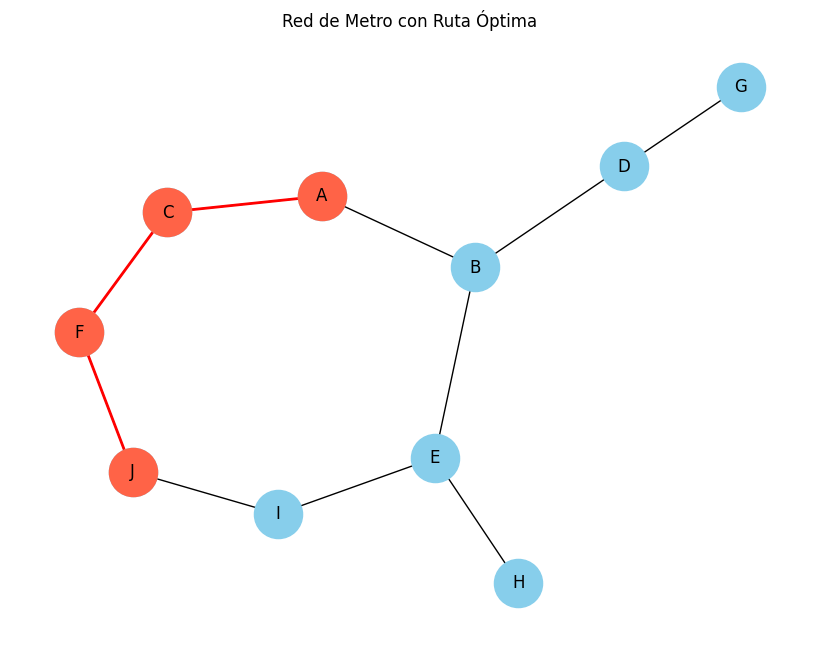

In [ ]:
# --- 4. VISUALIZACIÓN ---
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G2, seed=42) # Usamos una semilla para una visualización consistente
nx.draw(G2, pos, with_labels=True, node_color='skyblue', node_size=1200, font_size=12)

# Resaltar la ruta encontrada (usamos la de BFS, ya que es la misma)
if path_bfs:
    path_edges = list(zip(path_bfs, path_bfs[1:]))
    nx.draw_networkx_nodes(G2, pos, nodelist=path_bfs, node_color='tomato', node_size=1200)
    nx.draw_networkx_edges(G2, pos, edgelist=path_edges, edge_color='red', width=2)

plt.title("Red de Metro con Ruta Óptima")
plt.show()

### **6. Evaluación de la complejidad computacional (temporal y espacial).**

In [ ]:
# --- 5. FUNCIÓN PARA GENERAR PROBLEMAS NO PONDERADOS ---
def generate_unweighted_problem(num_nodes, edge_factor=1.5):
    """Genera un grafo aleatorio no ponderado y conectado."""
    num_edges = int(num_nodes * edge_factor)
    # Usamos una semilla aleatoria para obtener diferentes grafos en cada ejecución
    graph = nx.gnm_random_graph(num_nodes, num_edges, seed=random.randint(0, 10000))
    # Aseguramos que el grafo sea conexo
    if not nx.is_connected(graph):
        components = list(nx.connected_components(graph))
        for i in range(len(components) - 1):
            node1 = random.choice(list(components[i]))
            node2 = random.choice(list(components[i+1]))
            graph.add_edge(node1, node2)
    start_node = 0
    goal_node = num_nodes - 1
    return graph, start_node, goal_node

In [ ]:
# --- 6. LÓGICA DEL EXPERIMENTO ---
node_sizes = range(20, 301, 20)  # Probamos con grafos de 20 a 300 nodos
bfs_results_list = []
ids_results_list = []

print("Iniciando experimento de complejidad BFS vs. IDS...")

for size in node_sizes:
    G, start, goal = generate_unweighted_problem(size)

    # --- Ejecutar y medir BFS ---
    tracemalloc.start()
    t_start = time.perf_counter()
    path_bfs, metrics_bfs = bfs_with_metrics(G, start, goal)
    t_end = time.perf_counter()
    _, bfs_peak_mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    metrics_bfs['execution_time'] = t_end - t_start
    metrics_bfs['peak_memory_kb'] = bfs_peak_mem / 1024
    bfs_results_list.append(metrics_bfs)

    # --- Ejecutar y medir IDS ---
    tracemalloc.start()
    t_start = time.perf_counter()
    path_ids, metrics_ids = ids_with_metrics(G, start, goal)
    t_end = time.perf_counter()
    _, ids_peak_mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    metrics_ids['execution_time'] = t_end - t_start
    ids_metrics['peak_memory_kb'] = ids_peak_mem / 1024
    ids_results_list.append(ids_metrics)

    print(f"Grafo de {size} nodos procesado.")

Iniciando experimento de complejidad BFS vs. IDS...
Grafo de 20 nodos procesado.
Grafo de 40 nodos procesado.
Grafo de 60 nodos procesado.
Grafo de 80 nodos procesado.
Grafo de 100 nodos procesado.
Grafo de 120 nodos procesado.
Grafo de 140 nodos procesado.
Grafo de 160 nodos procesado.
Grafo de 180 nodos procesado.
Grafo de 200 nodos procesado.
Grafo de 220 nodos procesado.
Grafo de 240 nodos procesado.
Grafo de 260 nodos procesado.
Grafo de 280 nodos procesado.
Grafo de 300 nodos procesado.


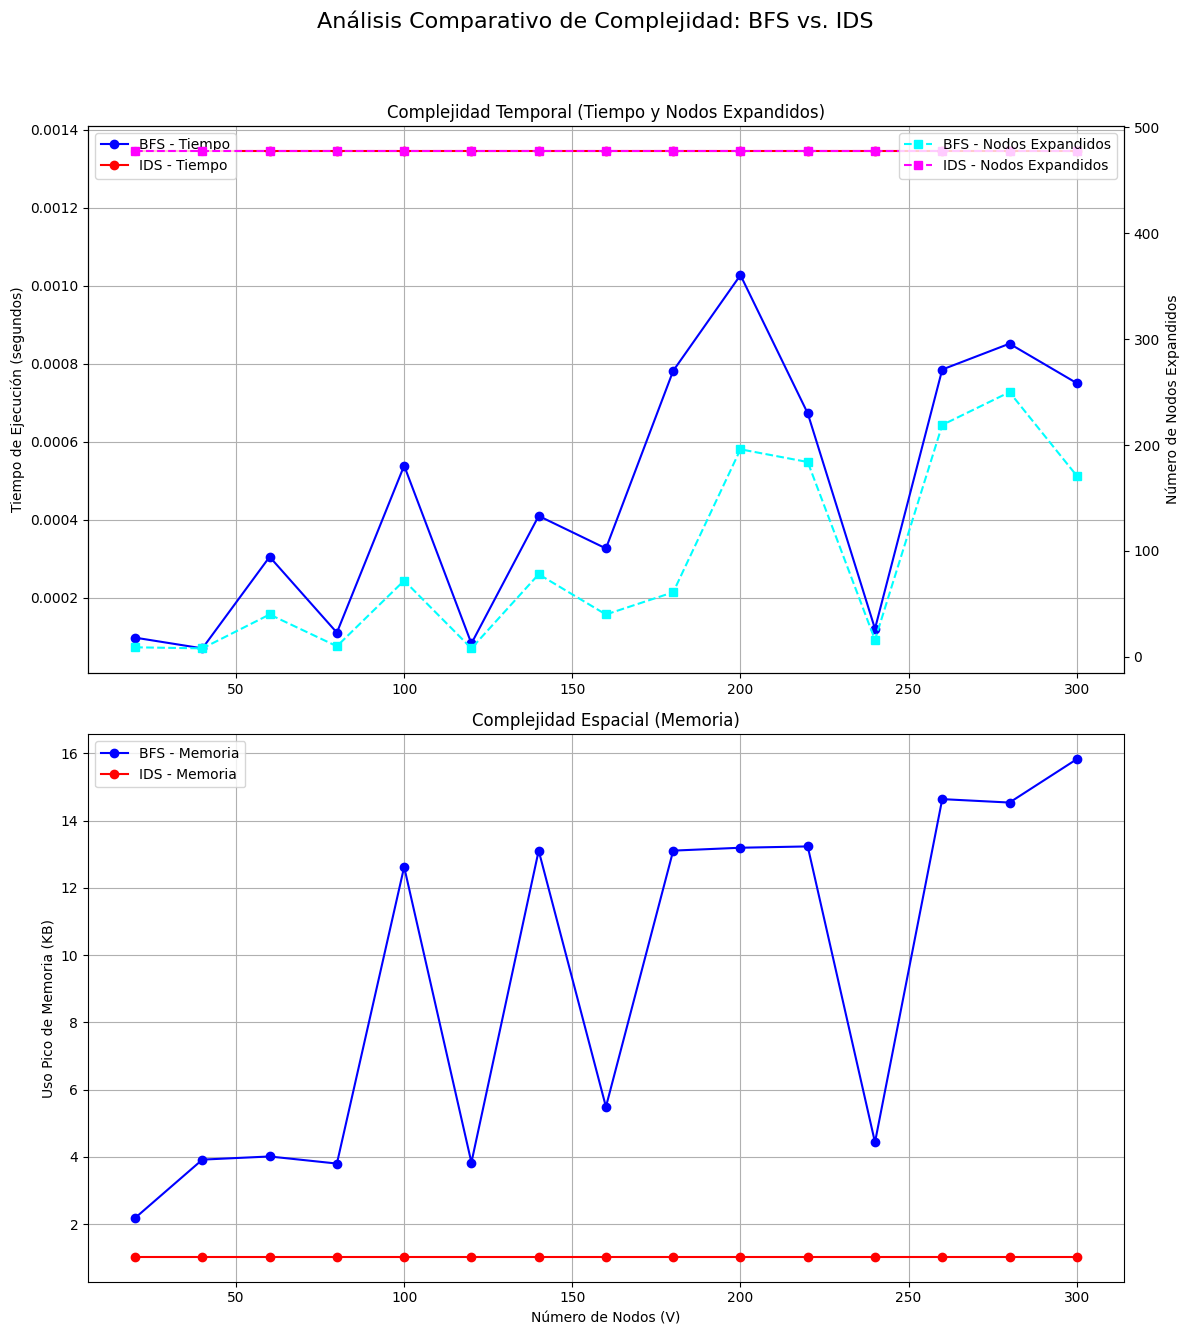

In [ ]:
# --- 7. VISUALIZACIÓN DE RESULTADOS COMPARATIVOS ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))
fig.suptitle('Análisis Comparativo de Complejidad: BFS vs. IDS', fontsize=16)

# Extraer datos para graficar
sizes = node_sizes
bfs_times = [r['execution_time'] for r in bfs_results_list]
ids_times = [r['execution_time'] for r in ids_results_list]
bfs_mems = [r['peak_memory_kb'] for r in bfs_results_list]
ids_mems = [r['peak_memory_kb'] for r in ids_results_list]
bfs_nodes = [r['nodes_expanded'] for r in bfs_results_list]
ids_nodes = [r['nodes_expanded'] for r in ids_results_list]

# Gráfico 1: Complejidad Temporal
ax1.plot(sizes, bfs_times, 'o-', color='blue', label='BFS - Tiempo')
ax1.plot(sizes, ids_times, 'o-', color='red', label='IDS - Tiempo')
ax1.set_ylabel('Tiempo de Ejecución (segundos)')
ax1.set_title('Complejidad Temporal (Tiempo y Nodos Expandidos)')
ax1.grid(True)
ax1.legend(loc='upper left')

# Eje Y secundario para Nodos Expandidos
ax1_twin = ax1.twinx()
ax1_twin.plot(sizes, bfs_nodes, 's--', color='cyan', label='BFS - Nodos Expandidos')
ax1_twin.plot(sizes, ids_nodes, 's--', color='magenta', label='IDS - Nodos Expandidos')
ax1_twin.set_ylabel('Número de Nodos Expandidos')
ax1_twin.legend(loc='upper right')

# Gráfico 2: Complejidad Espacial
ax2.plot(sizes, bfs_mems, 'o-', color='blue', label='BFS - Memoria')
ax2.plot(sizes, ids_mems, 'o-', color='red', label='IDS - Memoria')
ax2.set_xlabel('Número de Nodos (V)')
ax2.set_ylabel('Uso Pico de Memoria (KB)')
ax2.set_title('Complejidad Espacial (Memoria)')
ax2.grid(True)
ax2.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### **7. Reflexion crıtica sobre eficiencia, aplicabilidad, y posibles mejoras**

**1. Eficiencia:**

**Memoria (Gráfico de Abajo)**: Este gráfico es la clave. La memoria de BFS (azul) va subiendo junto con el tamaño de la red, lo cual tiene sentido porque tiene que guardar muchos nodos en su cola. En cambio, la memoria de IDS (rojo) es una línea plana casi en cero. Esto demuestra perfectamente su gran ventaja: casi no gasta memoria, sin importar qué tan grande sea el grafo.

**Tiempo (Gráfico de Arriba)**: Aquí la cosa es más rara. A primera vista, parece que IDS (rojo) es instantáneo, pero es una ilusión. Si miras su línea de "Nodos Expandidos" (magenta), está altísima y plana. Esto nos dice que el algoritmo está trabajando muchísimo pero probablemente se rinde antes de tiempo porque alcanza su límite de profundidad (max_depth). Por eso, no podemos fiarnos de su tiempo de ejecución en este experimento; no está compitiendo en igualdad de condiciones.

En resumen, los gráficos nos muestran que IDS es increíblemente ligero en memoria, pero el experimento no logró medir bien cuánto más lento es en realidad.

**2. Aplicabilidad**:

*   Usar BFS (Búsqueda en Anchura): Opción por defecto casi siempre. Si se desea encontrar la ruta más corta (en número de paradas) y hay suficiente memoria RAM, BFS es rápido, fiable y fácil de implementar.
*   Usar IDS (Búsqueda en Profundidad Iterativa): Se selecciona cuando el espacio es un problema. IDS permite encontrar la solución pagando un alto costo en tiempo de procesamiento para no agotar la memoria.





**3. Posibles Mejoras:**

Corregir el Experimento: Para una comparación justa, el parámetro max_depth de IDS debería ser mucho mayor o ilimitado para asegurar que pueda encontrar la solución. Así, su tiempo de ejecución reflejaría el trabajo real necesario, que sería mucho mayor que el de BFS.

Mejorar la Elección: En un sistema real, se podría implementar una estrategia híbrida: intentar usar BFS por su velocidad, pero si el uso de memoria excede un umbral predefinido, cancelar y cambiar a IDS para garantizar que la operación no falle por falta de recursos.

###**Cuestionamientos**

**1. ¿Qué pasa si el sistema crece a 100 nodos? ¿Cuál es el impacto en complejidad temporal?**

Al escalar la red, la diferencia de rendimiento entre BFS e IDS se vuelve mucho más evidente. La elección correcta depende del compromiso entre tiempo y memoria.

La complejidad es potencialmente exponencial. Aunque IDS es óptimo y completo como BFS, lo logra "re-explorando" los niveles superiores del árbol de búsqueda en cada iteración. En un grafo pequeño, este sobrecosto es insignificante. Pero en una red de 100 nodos con un factor de ramificación de, digamos, 3 o 4, el número de nodos visitados en la iteración final puede ser enorme. IDS será considerablemente más lento que BFS en la mayoría de los casos prácticos a esta escala. La principal ventaja de IDS no es el tiempo, sino la memoria, que es solo O(d), mientras que BFS puede consumir mucha memoria (O(b
d
 )) al almacenar todos los nodos de un nivel en la cola.

Para 100 nodos, en términos de tiempo, BFS es la opción claramente superior. IDS solo se consideraría si existieran restricciones de memoria extremadamente severas que hicieran inviable a BFS.

**2. ¿Puede automatizarse la elección del mejor algoritmo según el tamaño de la red?**

Sí, es posible y es recomendable crear un sistema de decisión automatizado (un "despachador de algoritmos"), pero la decisión no se basa solo en el tamaño.

Se podria implementar una función que analice las propiedades del grafo y el problema para elegir la mejor estrategia.

## Ejercicio 3: Filogenia (Biología)

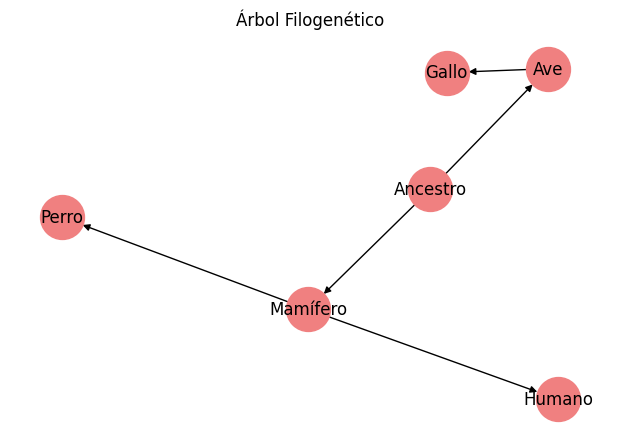

In [ ]:
# Grafo filogenético (simplificado)
G3 = nx.DiGraph()
edges3 = [('Ancestro', 'Mamífero'), ('Ancestro', 'Ave'), ('Mamífero', 'Humano'), ('Mamífero', 'Perro'), ('Ave', 'Gallo')]
G3.add_edges_from(edges3)

# Visualización
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G3)
nx.draw(G3, pos, with_labels=True, node_color='lightcoral', node_size=1000, arrows=True)
plt.title("Árbol Filogenético")
plt.show()

### **1. Análisis del problema y modelado del grafo**

**Objetivo**

El objetivo de resolución del problema es determinar el ancestro común más reciente (ACMR) entre múltiples pares de especies usando una estrategia basada en búsqueda en profundidad limitada (DLS), aplicada sobre un árbol filogenético representado como grafo acíclico dirigido (DAG). En este grafo cada arista va del ancestro hacia el descendiente más reciente por lo que para cada nodo terminal (especie), hay un único camino desde la raíz.

**Algoritmo de búsqueda**

La búsqueda en profundidad limitada (DLS) ofrece un control preciso sobre la profundidad explorada, lo que resulta especialmente útil para evitar ciclos infinitos en grafos más complejos y para adaptarse a árboles de gran tamaño mediante el ajuste del límite de profundidad. En este contexto, utilizamos DLS desde el nodo raíz para construir el camino desde el ancestro común hasta cada especie, y posteriormente comparamos ambos caminos para identificar el último nodo en común, que corresponde al ancestro común más reciente.


### **2. ¿La métrica aplicada en la búsqueda del ancestro común es adecuada?**

En esta búsqueda, utilizamos como métrica la cantidad de pasos (o profundidad) desde el nodo raíz del árbol, denominado “Ancestro”, hasta cada especie. A partir de ahí, comparamos los caminos completos desde la raíz hacia ambas especies para identificar el último nodo en común, que corresponde al ancestro común más reciente (ACMR).

Esta forma de medir es adecuada porque, en los árboles filogenéticos, la distancia desde la raíz refleja el momento evolutivo en que ocurrió una divergencia. Es decir, mientras más profundo está un nodo común, más reciente fue la separación entre las dos especies; si el nodo común está más cerca de la raíz, el ancestro es más antiguo. Además, esta métrica es eficiente desde el punto de vista computacional y se ajusta naturalmente a la estructura jerárquica del árbol. No requiere cálculos complejos y permite obtener resultados precisos sobre la relación evolutiva entre especies de forma clara y directa.

### **3. Implementación del código para búsqueda de ACMR**

In [ ]:
# --- 1. IMPLEMENTACIÓN DE BÚSQUEDA EN PROFUNDIDAD LIMITADA (DLS) CON MÉTRICAS ---
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import random

def dls_nx(graph, current, target, limit, path, stats):
    """
    Realiza una búsqueda en profundidad limitada (DLS) desde un nodo actual hasta un nodo objetivo.

    Parámetros:
    - graph: grafo dirigido de NetworkX.
    - current: nodo actual en la búsqueda.
    - target: nodo objetivo al que se desea llegar.
    - limit: profundidad máxima permitida en esta rama de búsqueda.
    - path: lista que almacena el camino actual desde el nodo raíz.
    - stats: diccionario que acumula métricas como el número de nodos expandidos.

    Retorna:
    - True si se encuentra el objetivo dentro del límite de profundidad.
    - False en caso contrario.
    """
    stats['nodes_expanded'] += 1  # Contador de nodos visitados
    path.append(current)          # Se agrega el nodo actual al camino

    if current == target:
        return True  # Se encontró el nodo objetivo

    if limit <= 0:
        path.pop()   # Se retrocede si se alcanzó el límite
        return False

    # Se recorre cada nodo hijo (vecino dirigido)
    for neighbor in graph.successors(current):
        if dls_nx(graph, neighbor, target, limit - 1, path, stats):
            return True

    path.pop()  # Backtracking si no se encuentra el objetivo en esta rama
    return False


def get_path_nx(graph, target, root='Ancestro', max_depth=20):
    """
    Obtiene el camino desde el nodo raíz hasta un nodo objetivo usando búsqueda en profundidad limitada.

    Parámetros:
    - graph: grafo dirigido de NetworkX.
    - target: nodo objetivo (especie).
    - root: nodo raíz del árbol (por defecto 'Ancestro').
    - max_depth: profundidad máxima de búsqueda.

    Retorna:
    - path: lista con los nodos del camino si se encuentra.
    - nodes_expanded: número total de nodos expandidos durante la búsqueda.
    """
    for limit in range(1, max_depth + 1):  # Itera con profundidades crecientes
        path = []
        stats = {'nodes_expanded': 0}
        if dls_nx(graph, root, target, limit, path, stats):
            return path, stats['nodes_expanded']
    return None, 0  # Si no se encuentra el nodo objetivo


def find_acmr_nx(graph, species1, species2, root='Ancestro', max_depth=20):
    """
    Encuentra el Ancestro Común Más Reciente (ACMR) entre dos especies usando rutas obtenidas con DLS.

    Parámetros:
    - graph: grafo dirigido de NetworkX.
    - species1: primera especie.
    - species2: segunda especie.
    - root: nodo raíz del árbol filogenético.
    - max_depth: profundidad máxima de búsqueda.

    Retorna:
    - Un diccionario con:
        - species1, species2: nombres de las especies comparadas.
        - acmr: nodo que representa el ancestro común más reciente.
        - path1, path2: rutas desde la raíz hasta cada especie.
        - nodes_expanded: suma total de nodos expandidos en ambas búsquedas.
        - depth_reached: profundidad máxima alcanzada en cualquiera de las rutas.
        - execution_time: tiempo total de ejecución de la búsqueda (en segundos).
    """
    start = time.time()  # Se mide el tiempo inicial

    # Obtener caminos desde la raíz a cada especie
    path1, nodes1 = get_path_nx(graph, species1, root, max_depth)
    path2, nodes2 = get_path_nx(graph, species2, root, max_depth)

    end = time.time()  # Tiempo final de ejecución

    acmr = None

    # Si no se encuentra alguna de las especies, se retorna sin ACMR
    if path1 is None or path2 is None:
        return {
            "species1": species1,
            "species2": species2,
            "acmr": None,
            "path1": path1,
            "path2": path2,
            "nodes_expanded": nodes1 + nodes2,
            "depth_reached": 0,
            "execution_time": end - start
        }

    # Comparar ambos caminos para encontrar el último nodo común (ACMR)
    for a, b in zip(path1, path2):
        if a == b:
            acmr = a
        else:
            break

    return {
        "species1": species1,
        "species2": species2,
        "acmr": acmr,
        "path1": path1,
        "path2": path2,
        "nodes_expanded": nodes1 + nodes2,
        "depth_reached": max(len(path1), len(path2)) - 1,
        "execution_time": end - start
    }


In [ ]:
# --- 2. FUNCIONES PARA EJECUTAR LA BUSQUEDA CON MULTIPLES PARES DE ESPECIES Y VISUALIZAR RESULTADOS ---

def run_multiple_queries_nx(graph, species_list, root='Ancestro', max_depth=20):
    """
    Ejecuta múltiples consultas de búsqueda del ACMR entre todos los pares posibles de especies.

    Parámetros:
    - graph: grafo dirigido de NetworkX que representa el árbol filogenético.
    - species_list: lista de nombres de especies (nodos hoja del árbol) a comparar.
    - root: nodo raíz del árbol (por defecto 'Ancestro').
    - max_depth: profundidad máxima permitida en la búsqueda.

    Retorna:
    - Lista de diccionarios con los resultados de cada búsqueda ACMR, tal como retorna find_acmr_nx().
    """
    results = []
    # Se recorren todos los pares únicos sin repetición
    for i in range(len(species_list)):
        for j in range(i + 1, len(species_list)):
            result = find_acmr_nx(
                graph,
                species_list[i],
                species_list[j],
                root,
                max_depth
            )
            visualize_acmr(
                graph=graph,
                path1=result['path1'],
                path2=result['path2'],
                acmr_node=result['acmr'],
                title=f"Ruta ACMR: {result['acmr']} entre {result['species1']} y {result['species2']}"
            )
            results.append(result)
    return results

def generate_acmr_matrix_nx(results, species_list):
    """
    Construye una matriz cuadrada que contiene los ancestros comunes más recientes (ACMR)
    para todos los pares de especies analizados.

    Parámetros:
    - results: lista de diccionarios con resultados de búsqueda ACMR (output de run_multiple_queries_nx).
    - species_list: lista de especies (usada para definir filas y columnas de la matriz).

    Retorna:
    - Un DataFrame de pandas donde cada celda (i, j) contiene el ACMR entre especie_i y especie_j.
    """
    matrix = pd.DataFrame(index=species_list, columns=species_list)

    for r in results:
        s1, s2 = r['species1'], r['species2']
        acmr = r['acmr']
        # Se llenan ambas posiciones (i, j) y (j, i) con el mismo ACMR
        matrix.loc[s1, s2] = acmr
        matrix.loc[s2, s1] = acmr
        # También se asigna la diagonal con la especie misma
        matrix.loc[s1, s1] = s1
        matrix.loc[s2, s2] = s2

    return matrix

def plot_acmr_matrix(matrix, title="Matriz de Ancestro Cómun Más Reciente (ACMR) para cada especie"):
    """
    Visualiza la matriz de ancestros comunes más recientes usando un mapa de calor (heatmap).

    Parámetros:
    - matrix: DataFrame cuadrado generado por generate_acmr_matrix_nx.
    - title: título del gráfico.

    Visualiza:
    - Un heatmap donde se resaltan las celdas con ancestros comunes, usando una codificación de colores.
    """
    plt.figure(figsize=(10, 8))

    # Se genera una máscara booleana para resaltar visualmente las coincidencias
    sns.heatmap(
        matrix.isin(matrix.columns).astype(int),  # 1 si es especie válida, 0 si es NaN o ausente
        annot=matrix.values,                      # Muestra los nombres en las celdas
        fmt="",                                   # Formato de texto directo
        cmap="YlGnBu",                            # Paleta de color
        cbar=False                                # Sin barra de color adicional
    )

    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def visualize_acmr(graph, path1, path2, acmr_node, title="Ruta hacia el Ancestro Común Más Reciente"):
    """
    Visualiza el árbol con los caminos desde la raíz a dos especies y resalta el ancestro común más reciente.

    Parámetros:
    - graph: grafo dirigido de NetworkX.
    - path1: ruta desde la raíz a la especie 1.
    - path2: ruta desde la raíz a la especie 2.
    - acmr_node: nodo que representa el ancestro común más reciente.
    - title: título del gráfico.
    """
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(graph, seed=42)  # Posiciones fijas para reproducibilidad

    # Dibujar todos los nodos inicialmente
    nx.draw(graph, pos, with_labels=True, node_color='lightgray', node_size=1000, font_size=10, arrows=True)

    # Convertir caminos a conjuntos de aristas
    edges1 = list(zip(path1, path1[1:]))
    edges2 = list(zip(path2, path2[1:]))

    # Encontrar la parte compartida (hasta el ACMR)
    acmr_index = path1.index(acmr_node)
    shared_path = path1[:acmr_index+1]
    shared_edges = list(zip(shared_path, shared_path[1:]))

    # Parte específica de cada especie (luego del ACMR)
    unique_path1 = path1[acmr_index+1:]
    unique_edges1 = list(zip(path1[acmr_index:-1], path1[acmr_index+1:]))

    unique_path2 = path2[acmr_index+1:]
    unique_edges2 = list(zip(path2[acmr_index:-1], path2[acmr_index+1:]))

    # Dibujar caminos únicos de especie 1 (en azul)
    nx.draw_networkx_nodes(graph, pos, nodelist=unique_path1, node_color='lightskyblue', node_size=1000)
    nx.draw_networkx_edges(graph, pos, edgelist=unique_edges1, edge_color='blue', width=2)

    # Dibujar caminos únicos de especie 2 (en verde)
    nx.draw_networkx_nodes(graph, pos, nodelist=unique_path2, node_color='lightgreen', node_size=1000)
    nx.draw_networkx_edges(graph, pos, edgelist=unique_edges2, edge_color='green', width=2)

    # Dibujar ruta compartida hasta el ACMR (en rojo)
    nx.draw_networkx_nodes(graph, pos, nodelist=shared_path, node_color='tomato', node_size=1000)
    nx.draw_networkx_edges(graph, pos, edgelist=shared_edges, edge_color='red', width=2)

    plt.title(title)
    plt.show()



### **4. Resultado de búsqueda y medidas de desempeño**

🔴 Rojo: camino compartido desde la raíz hasta el ACMR.

🔵 Azul claro: tramo exclusivo hacia la especie 1.

🟢 Verde claro: tramo exclusivo hacia la especie 2.

⚪ Gris claro: el resto del árbol.

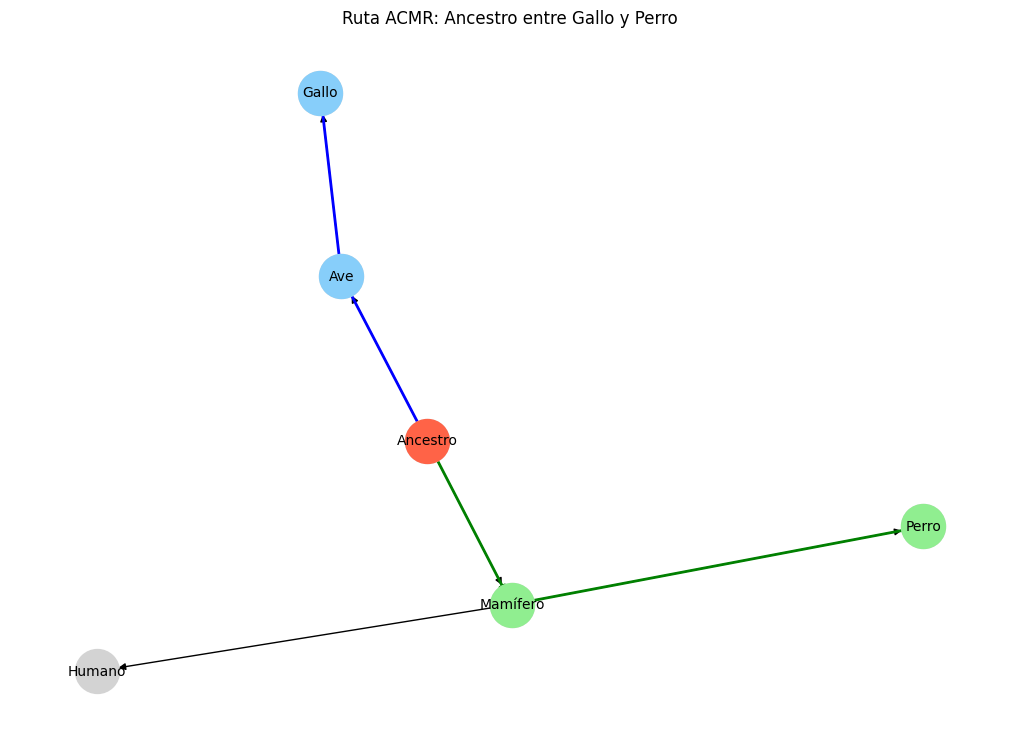

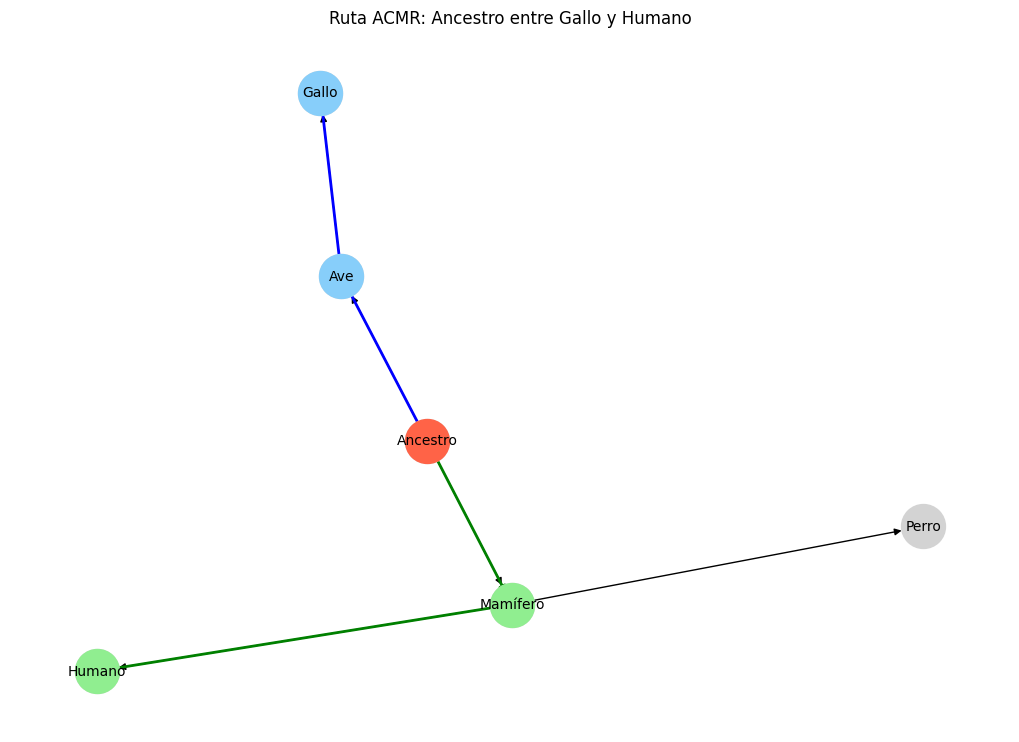

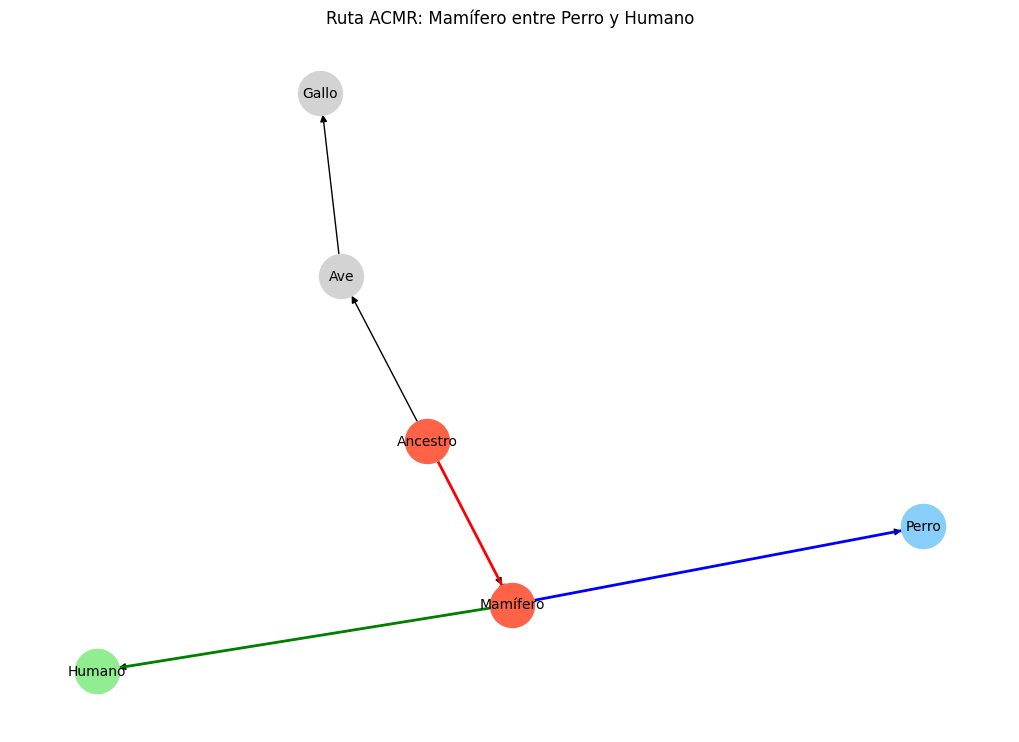

In [ ]:
species_list = ["Gallo", "Perro", "Humano"]
results = run_multiple_queries_nx(G3, species_list)

******** Gallo vs Perro **********
ACMR: Ancestro
Ruta 1: ['Ancestro', 'Ave', 'Gallo']
Ruta 2: ['Ancestro', 'Mamífero', 'Perro']
Nodos expandidos: 10
Profundidad alcanzada: 2
Tiempo ejecución: 0.000026 s

******** Gallo vs Humano **********
ACMR: Ancestro
Ruta 1: ['Ancestro', 'Ave', 'Gallo']
Ruta 2: ['Ancestro', 'Mamífero', 'Humano']
Nodos expandidos: 9
Profundidad alcanzada: 2
Tiempo ejecución: 0.000028 s

******** Perro vs Humano **********
ACMR: Mamífero
Ruta 1: ['Ancestro', 'Mamífero', 'Perro']
Ruta 2: ['Ancestro', 'Mamífero', 'Humano']
Nodos expandidos: 7
Profundidad alcanzada: 2
Tiempo ejecución: 0.000025 s



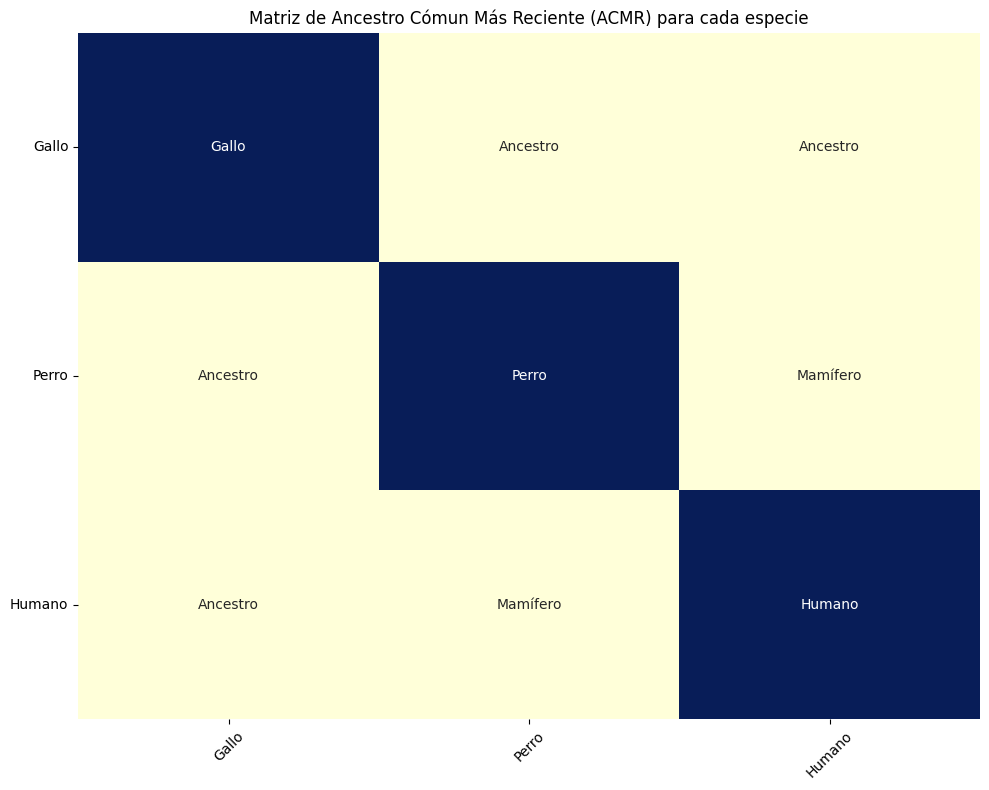

In [ ]:
# Mostrar resultados por par
for r in results:
    print(f"******** {r['species1']} vs {r['species2']} **********")
    print(f"ACMR: {r['acmr']}")
    print(f"Ruta 1: {r['path1']}")
    print(f"Ruta 2: {r['path2']}")
    print(f"Nodos expandidos: {r['nodes_expanded']}")
    print(f"Profundidad alcanzada: {r['depth_reached']}")
    print(f"Tiempo ejecución: {r['execution_time']:.6f} s")
    print()

# Matriz
matrix = generate_acmr_matrix_nx(results, species_list)
plot_acmr_matrix(matrix)

### **5. Evaluación de la complejidad computacional (temporal y espacial)**

In [ ]:
# --- 3. FUNCIONES PARA GENERAR ÁRBOLES DE GRAN TAMAÑO Y EJECUTAR EXPERIMENTOS ---
def generate_phylogenetic_tree(n_species=20, branching_factor=2):
    """
    Generates a synthetic phylogenetic tree represented as a directed acyclic graph (DAG).
    """
    G = nx.DiGraph()
    G.add_node("Ancestro")  # Nodo raíz del árbol
    species_counter = 0     # Contador para nombrar las especies generadas
    queue = ["Ancestro"]    # Cola para expansión en orden

    # Construcción del árbol expandiendo nodos hasta alcanzar el número deseado de especies
    while queue and species_counter < n_species:
        parent = queue.pop(0)
        for _ in range(branching_factor):
            if species_counter >= n_species:
                break
            child = f"Especie_{species_counter}"
            G.add_edge(parent, child)   # Se crea la arista desde el ancestro al nuevo nodo
            queue.append(child)         # Se agrega el nuevo nodo a la cola para seguir expandiendo
            species_counter += 1

    return G  # Devuelve el grafo resultante


def run_complexity_experiment(species_sizes, branching_factor=2, num_pairs=10):
    """
    Ejecuta un experimento para analizar la complejidad temporal y espacial
    de la búsqueda del ACMR en árboles de distintos tamaños.

    Parámetros:
    - max_especies_list: lista con diferentes valores de número de especies para generar árboles crecientes.
    - branching_factor: factor de ramificación de cada nodo (por defecto 2).
    - num_pares: número de pares aleatorios de especies a comparar en cada árbol.

    Retorna:
    - Una lista de diccionarios, donde cada uno contiene:
        - 'n_especies': tamaño del árbol.
        - 'tiempo_medio': tiempo promedio de búsqueda en segundos.
        - 'nodos_medio': nodos promedio expandidos por búsqueda.
        - 'profundidad_media': profundidad promedio alcanzada.
        - 'uso_memoria_kb': memoria estimada utilizada (en KB).
    """
    results = []

    for n_species in species_sizes:
        # Generar árbol sintético para cada tamaño
        G = generate_phylogenetic_tree(n_species=n_species, branching_factor=branching_factor)

        # Identificar hojas (nodos sin hijos, excluyendo la raíz)
        leaves = [n for n in G.nodes if G.out_degree(n) == 0 and n != "Ancestro"]
        if len(leaves) < 2:
            continue  # No se pueden formar pares si hay menos de 2 hojas

        # Crear pares aleatorios de especies a comparar
        pairs = [tuple(random.sample(leaves, 2)) for _ in range(num_pairs)]

        # Inicializar listas para métricas acumuladas
        times = []
        expanded_nodes = []
        depths = []

        # Ejecutar análisis para cada par
        for s1, s2 in pairs:
            result = find_acmr_nx(G, s1, s2)
            times.append(result['execution_time'])
            expanded_nodes.append(result['nodes_expanded'])
            depths.append(result['depth_reached'])

        # Guardar métricas agregadas por tamaño de árbol
        results.append({
            "n_species": n_species,
            "avg_time": np.mean(times),
            "avg_expanded": np.mean(expanded_nodes),
            "avg_depth": np.mean(depths),
            "estimated_memory_kb": np.mean(expanded_nodes) * 0.25  # Estimación: 250 bytes por nodo
        })

    return results  # Devuelve lista de métricas por tamaño de árbol


def plot_complexity_results(results):
    """
    Genera gráficas de líneas para visualizar cómo varían el tiempo de ejecución,
    los nodos expandidos y el uso estimado de memoria al incrementar el tamaño del árbol.

    Parámetros:
    - resultados: lista de diccionarios con los datos agregados por tamaño de árbol (output de experimento_complejidad).

    Visualiza:
    - Un gráfico con dos subplots:
        1. Tiempo de ejecución y nodos expandidos en función del número de especies.
        2. Uso estimado de memoria pico en función del número de especies.
    """

    sizes = [r['n_species'] for r in results]
    times = [r['avg_time'] for r in results]
    nodes = [r['avg_expanded'] for r in results]
    memory = [r['estimated_memory_kb'] for r in results]

        # Crear figura con dos gráficas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle("Análisis Empírico de Complejidad de Búsqueda de ACMR en Árboles Filogenéticos Grandes")

    # --- Subplot 1: Complejidad Temporal ---
    ax1.set_title("Complejidad Temporal")
    ax1.plot(sizes, times, 'o-b', label="Tiempo de ejecución (s)")
    ax1.set_xlabel("Número de Especies (N)")
    ax1.set_ylabel("Tiempo de Ejecución (segundos)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Eje secundario: nodos expandidos
    ax1b = ax1.twinx()
    ax1b.plot(sizes, nodes, 's--g', label="Nodos Expandidos")
    ax1b.set_ylabel("Número de Nodos Expandidos", color='green')
    ax1b.tick_params(axis='y', labelcolor='green')

    # --- Subplot 2: Complejidad Espacial ---
    ax2.set_title("Complejidad Espacial")
    ax2.plot(nodes, memory, 'o-r')
    ax2.set_xlabel("Número de Especies (N)")
    ax2.set_ylabel("Uso Estimado de Memoria Pico (KB)")

    # Ajuste de espacio entre los elementos
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


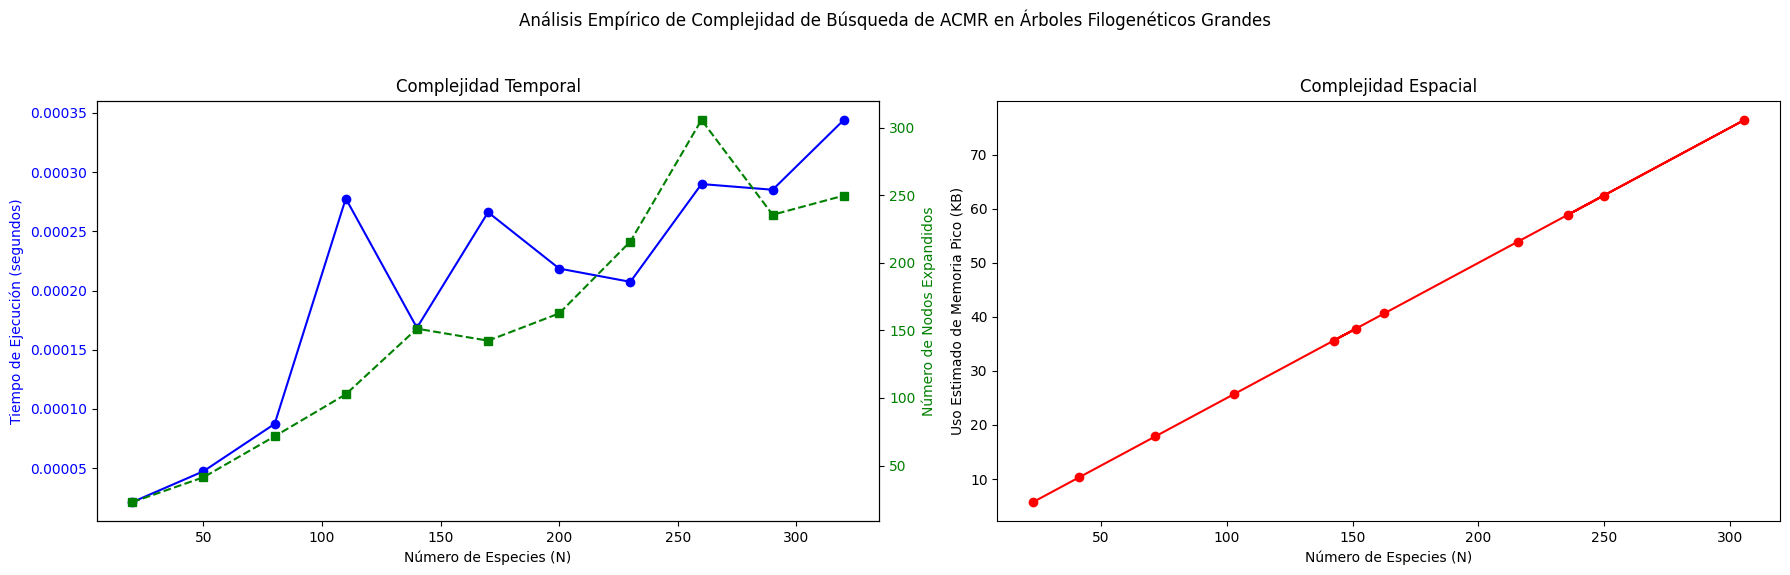

In [ ]:
# Lista de tamaños de árboles crecientes
n_especies_list = list(range(20, 321, 30))  # desde 20 hasta 320 especies
results = run_complexity_experiment(n_especies_list, branching_factor=2, num_pairs=10)
plot_complexity_results(results)


El gráfico de complejidad temporal muestra que el tiempo de ejecución promedio por búsqueda del ancestro común más reciente (ACMR) crece de forma moderada a medida que se incrementa el número de especies en el árbol, pasando de aproximadamente 0.00003 segundos con 20 especies, hasta cerca de 0.00034 segundos con 320 especies. Aunque la relación no es perfectamente lineal debido a la naturaleza aleatoria de los pares analizados, la tendencia general es creciente y está fuertemente correlacionada con el número de nodos expandidos, que también aumenta de forma sostenida desde valores cercanos a 20 nodos hasta más de 300 nodos en los árboles más grandes. Este comportamiento es esperable, ya que al aumentar la cantidad de nodos y la profundidad del árbol, es más probable que las búsquedas recorran caminos más largos. Aun así, el tiempo de respuesta se mantiene muy bajo, lo que indica una alta eficiencia computacional del algoritmo DLS incluso en estructuras de gran tamaño.

Por otro lado, el gráfico de complejidad espacial revela un crecimiento muy regular del uso estimado de memoria pico, desde alrededor de 6 KB con 20 especies hasta 75 KB con 320 especies. La forma casi lineal de esta curva sugiere que el consumo de memoria está directamente acoplado al número de nodos explorados, lo cual es deseable y esperable en algoritmos basados en recorrido sin estructuras adicionales pesadas como colas de prioridad. Esta eficiencia espacial confirma que el enfoque es altamente escalable para aplicaciones prácticas, ya que incluso con cientos de especies y múltiples consultas, la huella de memoria se mantiene en niveles muy bajos para cualquier sistema moderno.



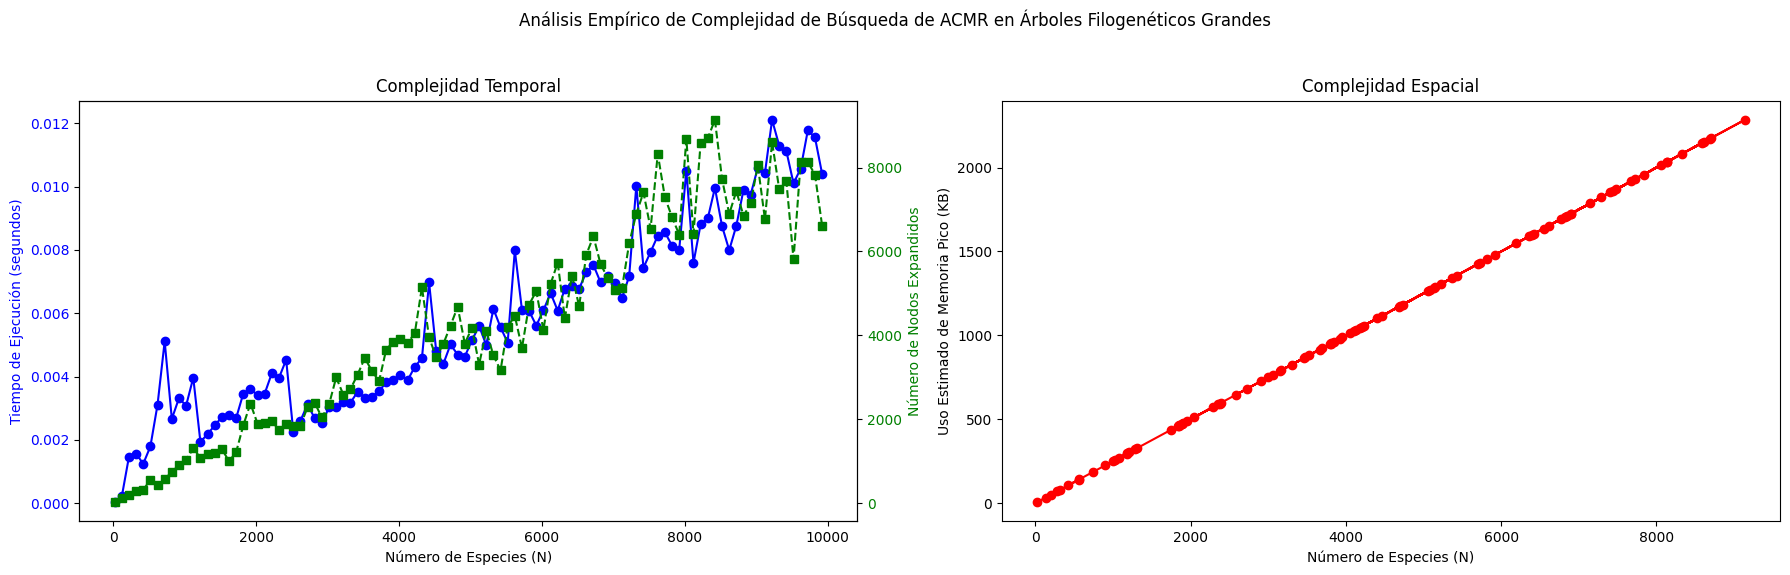

In [ ]:
# Lista de tamaños de árboles crecientes
n_especies_list = list(range(20, 10000, 100))  # desde 20 hasta 320 especies
results = run_complexity_experiment(n_especies_list, branching_factor=2, num_pairs=10)
plot_complexity_results(results)

El comportamiento se generaliza en escenarios con mayor número de especies (hasta 10000) evidenciando que, en árboles filogenéticos grandes, el tiempo de ejecución y la cantidad de nodos expandidos crecen de forma casi lineal con el número de especies, aunque con ligeras fluctuaciones debidas a la estructura particular de cada árbol. Esto indica que el algoritmo escala de manera eficiente en términos temporales, manteniendo una relación directa entre tamaño del problema y recursos computacionales usados.

### **6. Eficiencia, aplicabilidad, y posibles mejoras**

La implementación de búsqueda en profundidad limitada (DLS) para hallar el ancestro común más reciente (ACMR) demuestra ser altamente eficiente en árboles filogenéticos de tamaño pequeño a mediano. Los experimentos muestran tiempos de respuesta en el orden de milisegundos y un consumo de memoria moderado, incluso al escalar hasta árboles de más de 300 especies. Esta eficiencia se debe a que el algoritmo opera en árboles dirigidos acíclicos (DAG) con una estructura jerárquica clara, lo que permite un recorrido dirigido sin necesidad de estructuras adicionales complejas.

En cuanto a su aplicabilidad, este enfoque es útil en diversos campos como biología evolutiva, para determinar relaciones entre especies; análisis jerárquicos organizacionales, donde se buscan nodos comunes en estructuras tipo árbol (como departamentos o equipos), o campos como la genealogía, para encontrar ancestros comunes entre individuos. Además, su diseño modular y basado en grafos networkx permite adaptar fácilmente el enfoque a otros contextos, como árboles de dependencias en software o trazabilidad en cadenas de suministro.

Para mejorar su rendimiento en escenarios más exigentes, se pueden incorporar optimizaciones como el cacheo de rutas previamente exploradas, el uso de algoritmos especializados de Lowest Common Ancestor (LCA) con consultas en tiempo constante o logarítmico, y técnicas como Euler Tour con Range Minimum Query (RMQ). Asimismo, la paralelización del análisis para múltiples pares de especies permitiría escalar el enfoque a árboles con miles de nodos. Estas mejoras aumentarían significativamente la escalabilidad sin comprometer la precisión, haciendo del sistema una herramienta robusta para el análisis filogenético masivo.


### **7. Cuestionamientos críticos**

#### **¿Cómo afecta la elección de profundidad límite?**

El límite de profundidad en la búsqueda en profundidad limitada (DLS) determina cuán lejos puede explorar el algoritmo desde la raíz. Si el límite es demasiado bajo, es posible que no se alcance la especie objetivo, lo que impide construir el camino completo y, por tanto, calcular correctamente el ancestro común. Por el contrario, un límite demasiado alto hace que se recorran más nodos de los necesarios, aumentando el tiempo de ejecución y el uso de memoria sin aportar beneficios. Por ello, ajustar este parámetro en función de la estructura del árbol es clave para lograr un buen equilibrio entre eficiencia y cobertura.

#### **¿Podría automatizarse este análisis para múltiples pares?**

Sí, el análisis del ancestro común más reciente (ACMR) puede automatizarse fácilmente para múltiples pares de especies. De hecho, ya se ha implementado una función que recorre todos los pares posibles dentro de una lista de especies y ejecuta la búsqueda para cada uno, recopilando las rutas, los nodos expandidos, los tiempos de ejecución y los ancestros identificados. Además, el proceso puede escalarse aún más mediante técnicas de paralelización, permitiendo analizar cientos o miles de pares en paralelo.

A continuación se muestra un ejemplo con un árbol de prueba que agrupa multiples pares con la función **run_multiple_queries_nx** previamente definida.



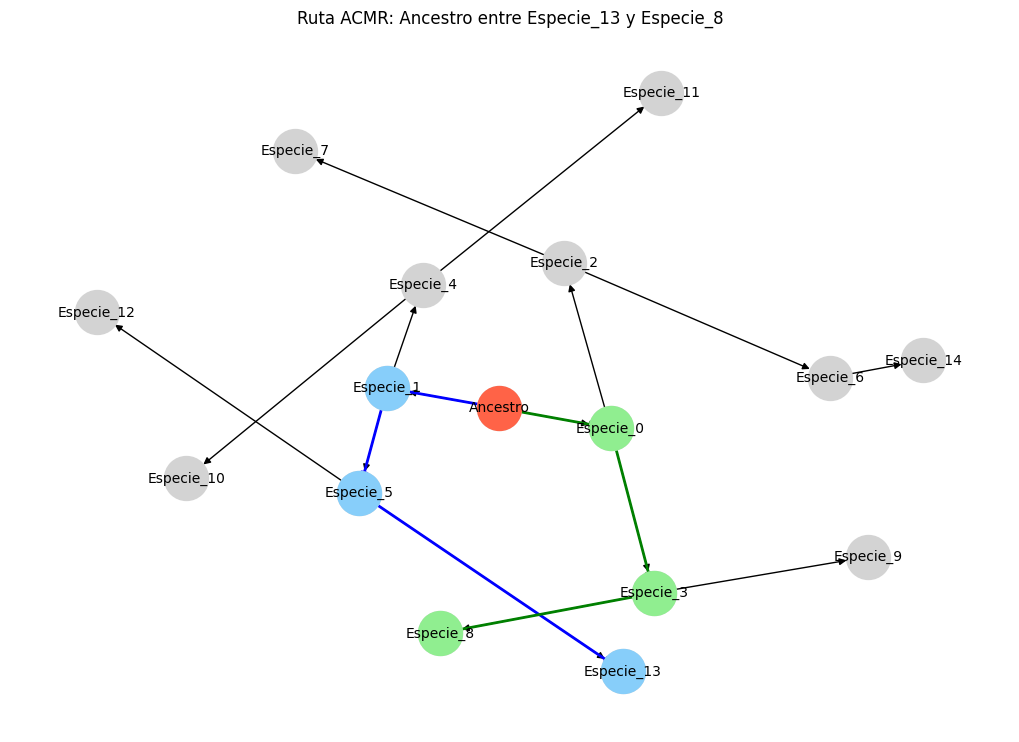

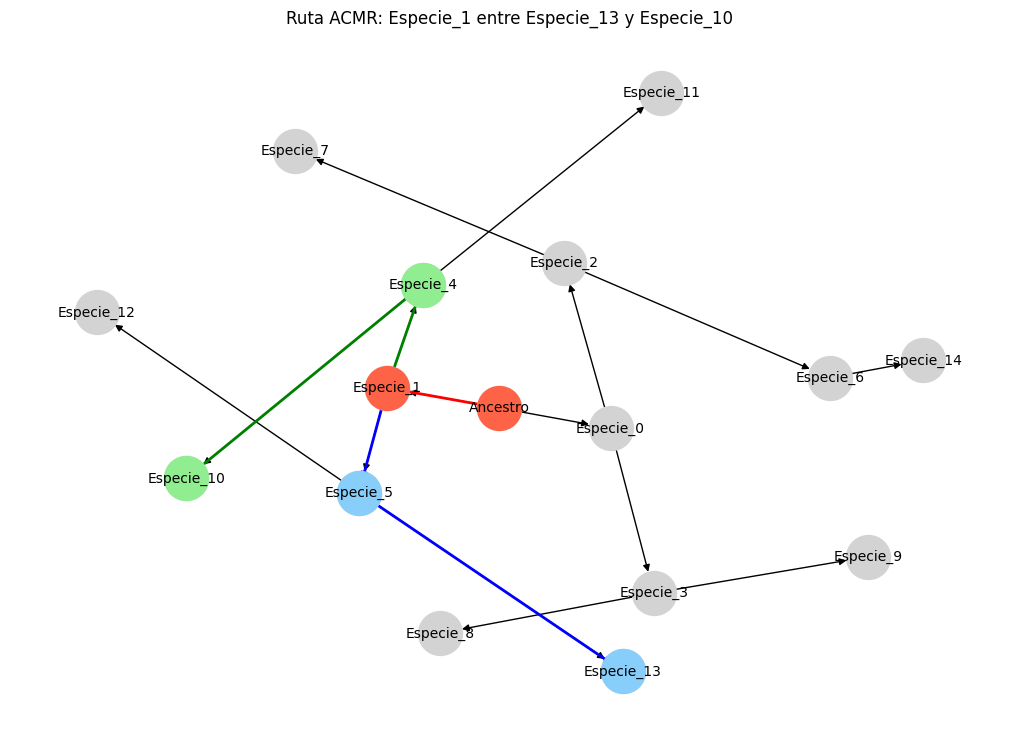

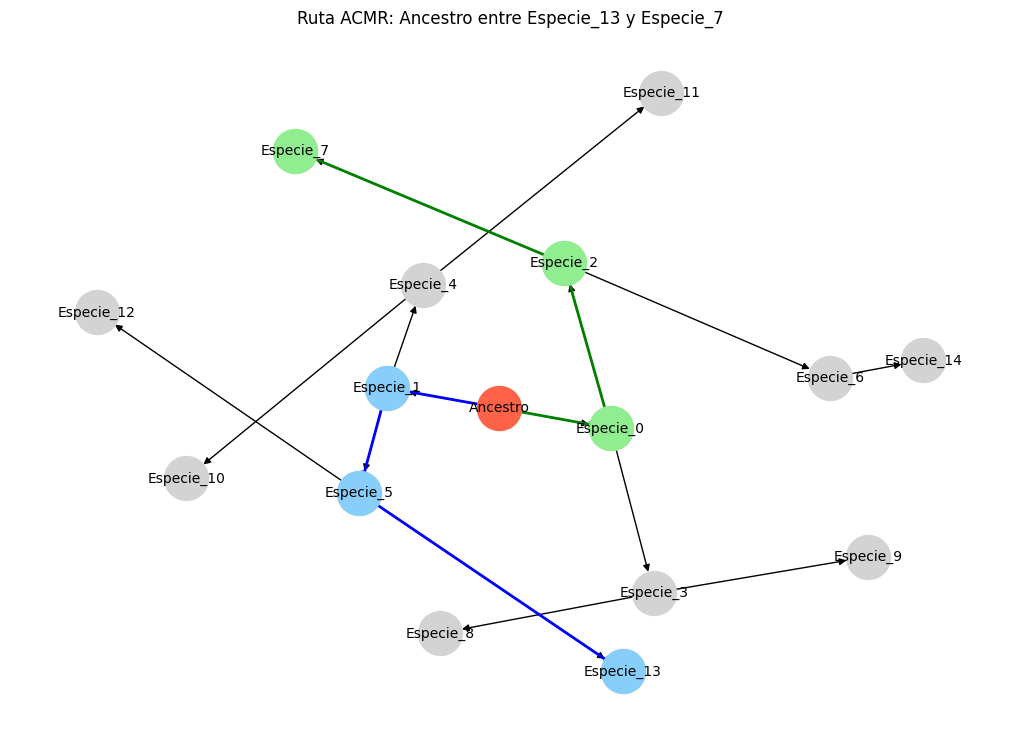

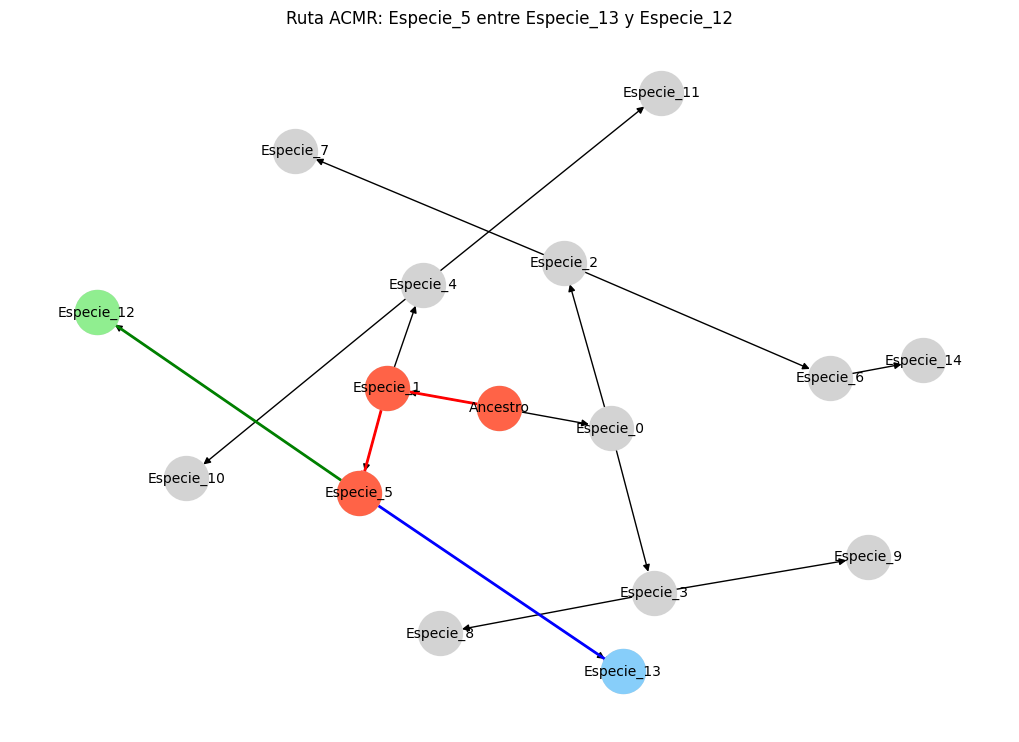

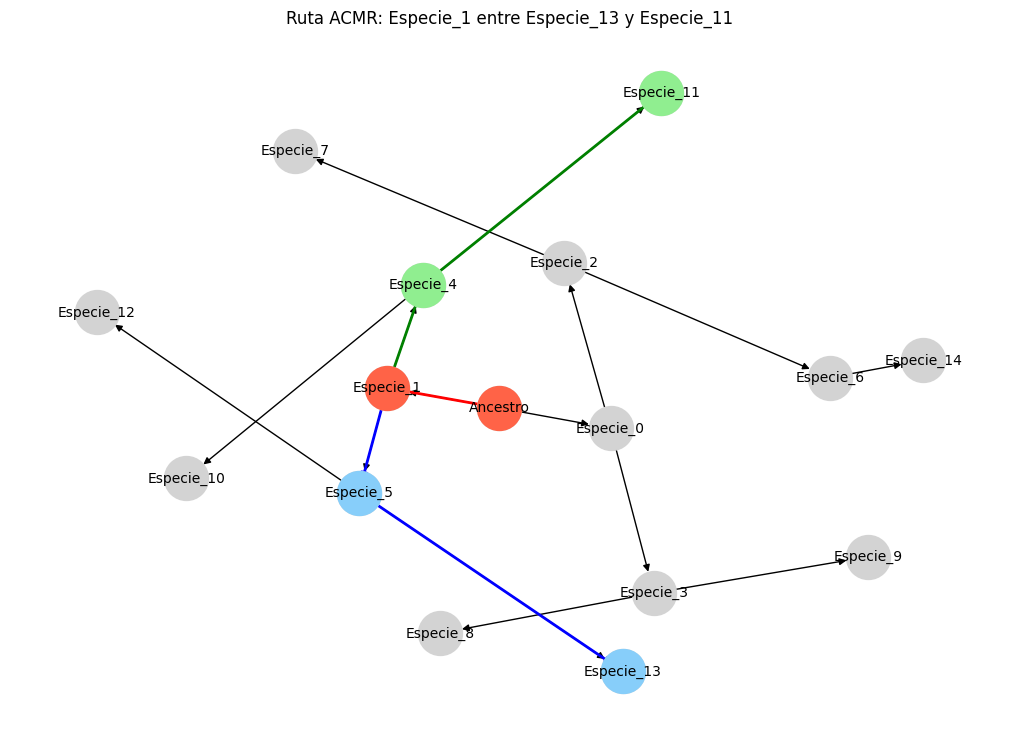

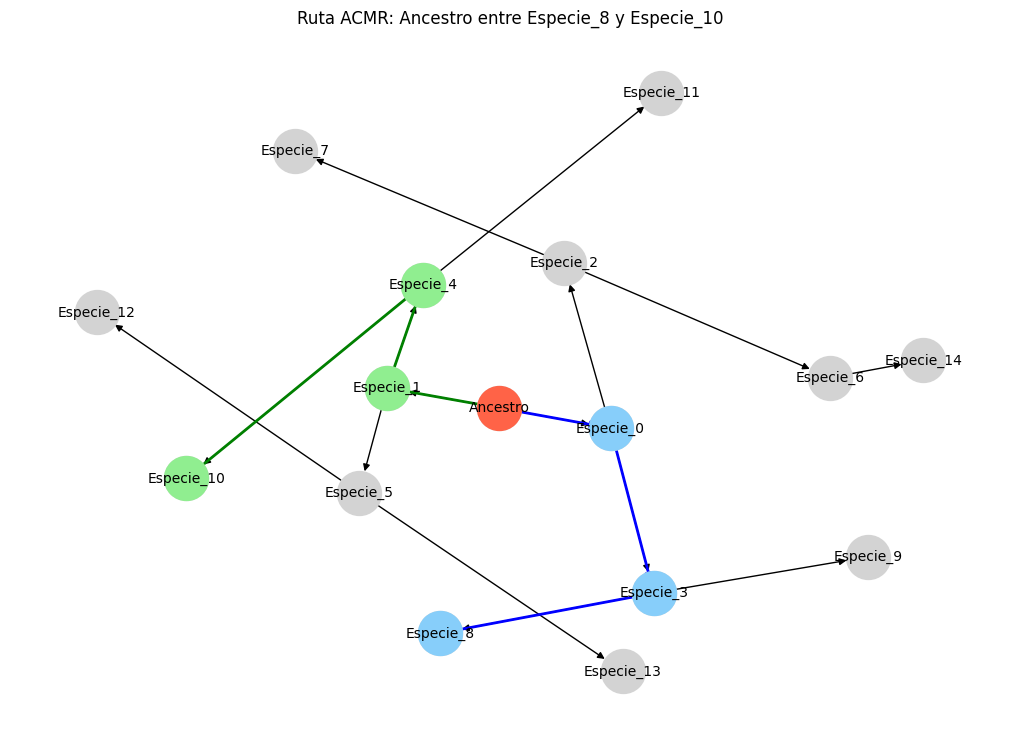

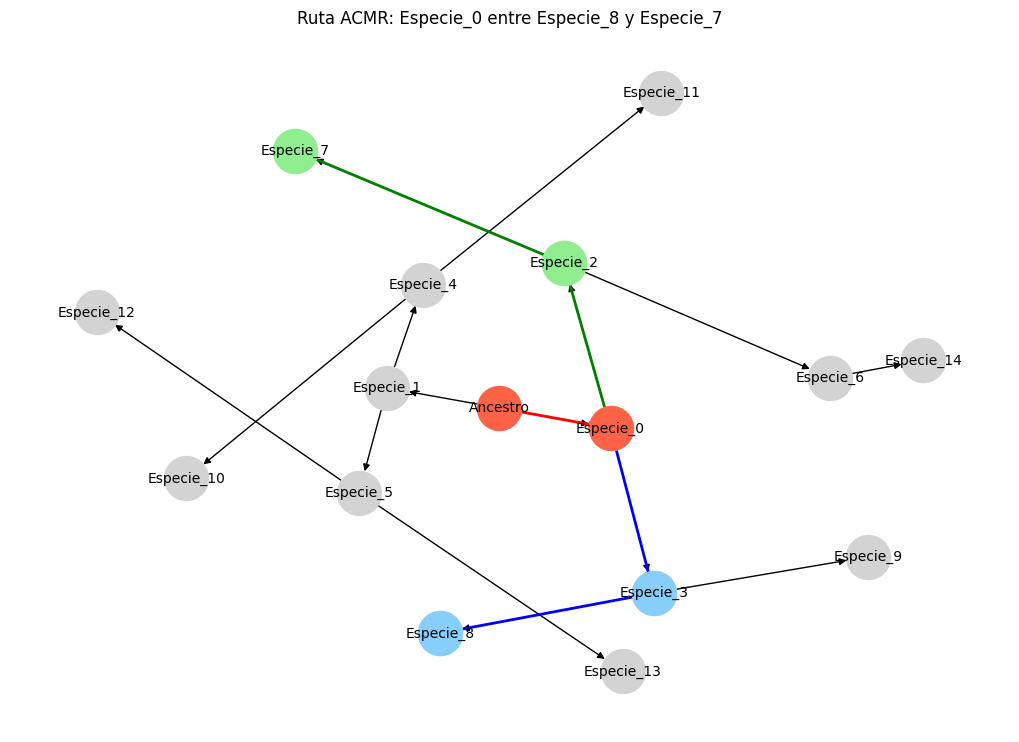

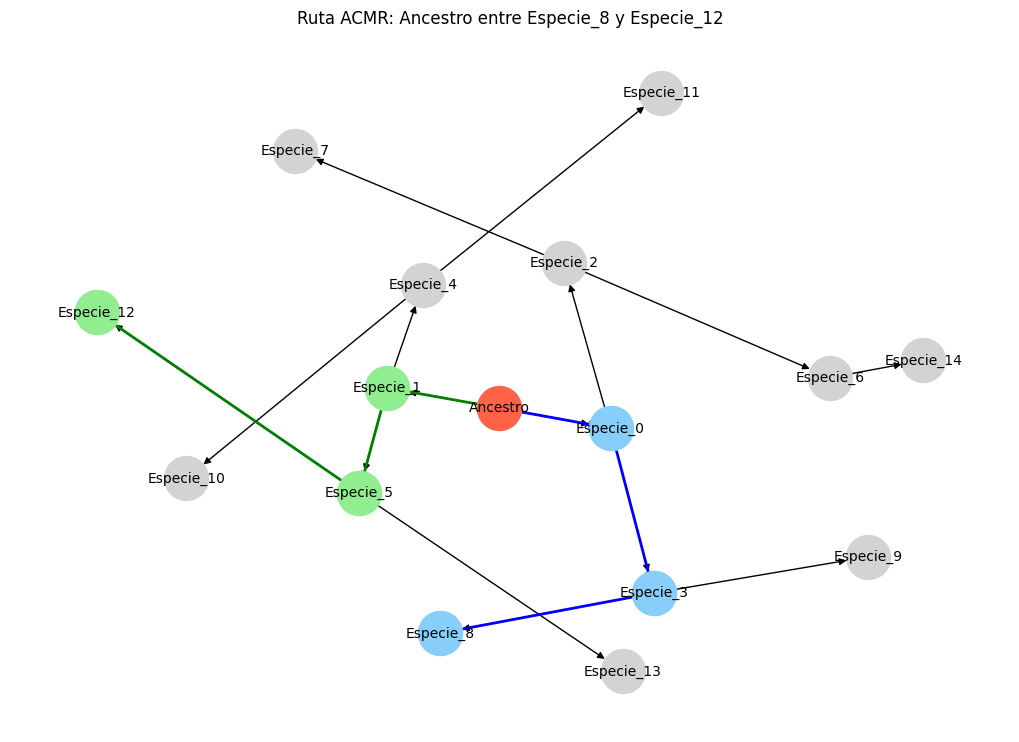

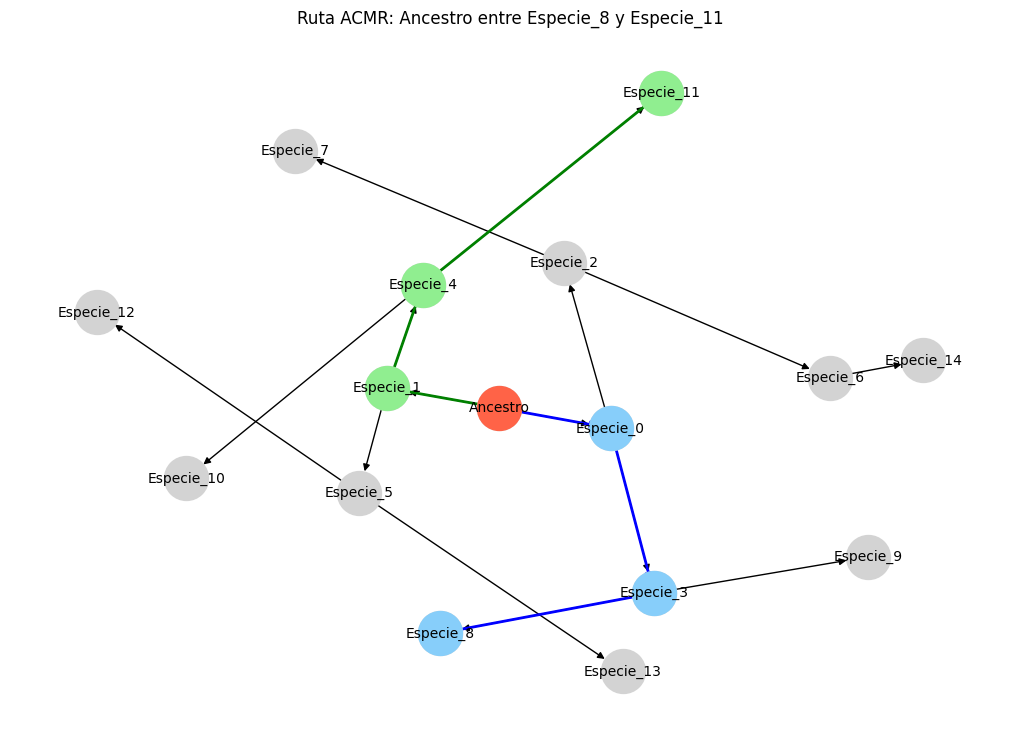

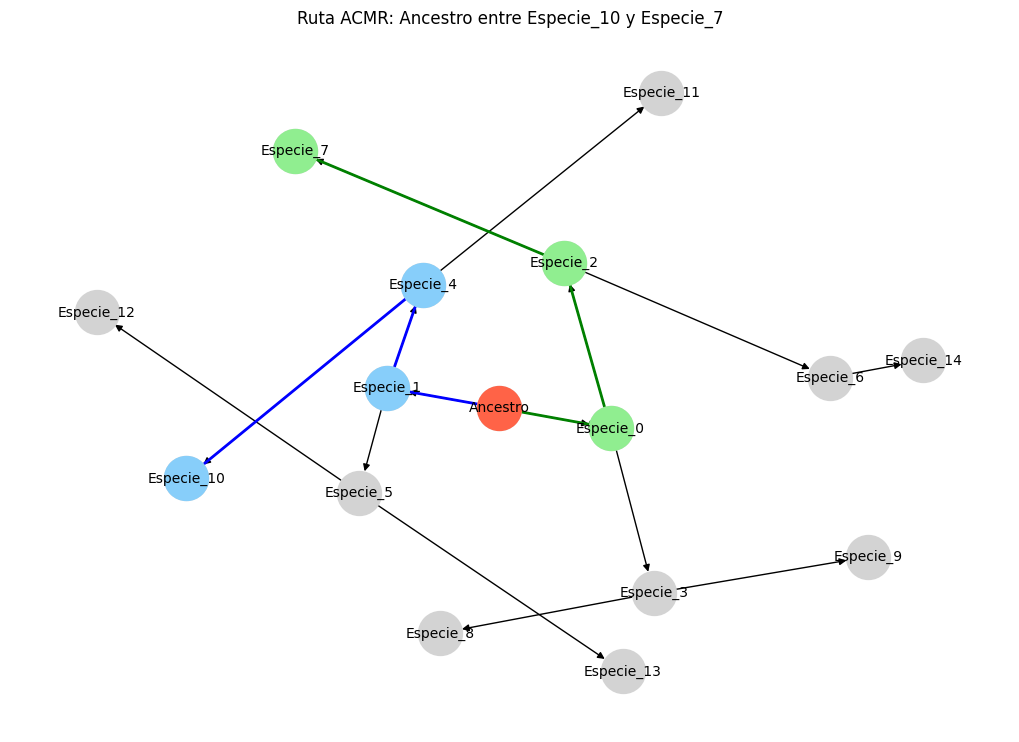

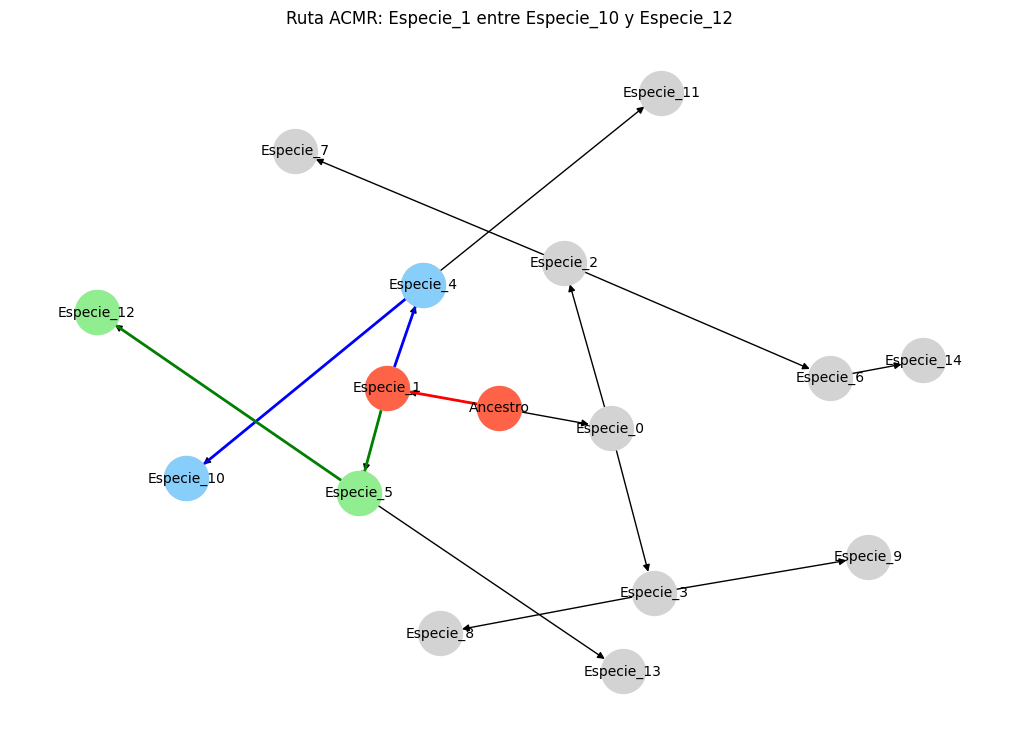

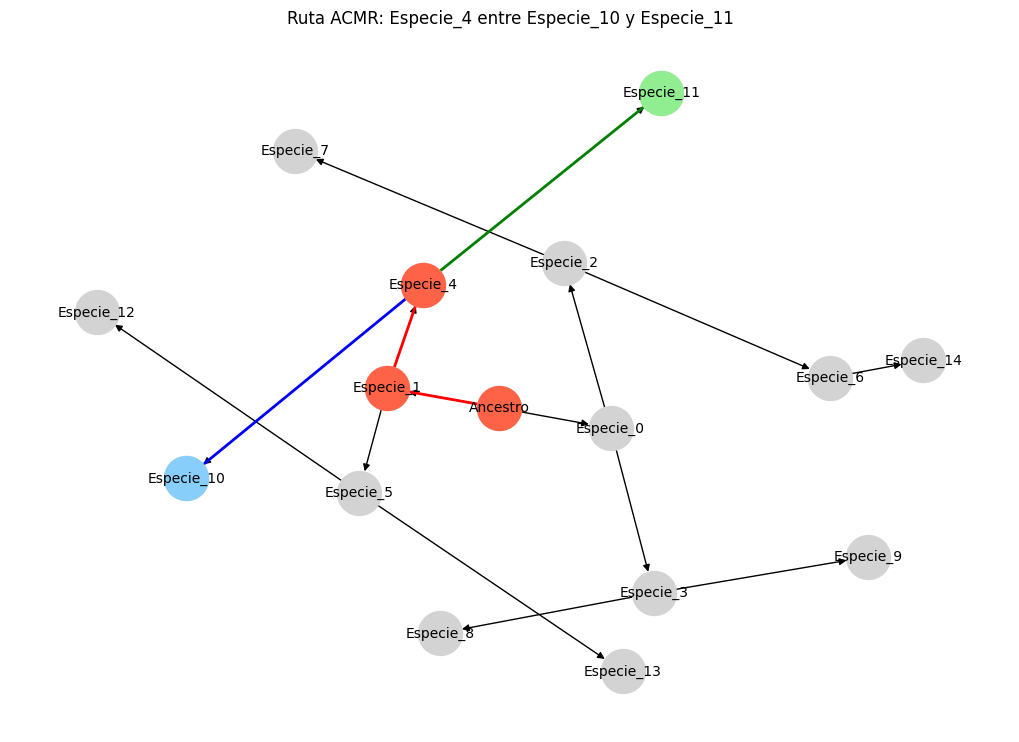

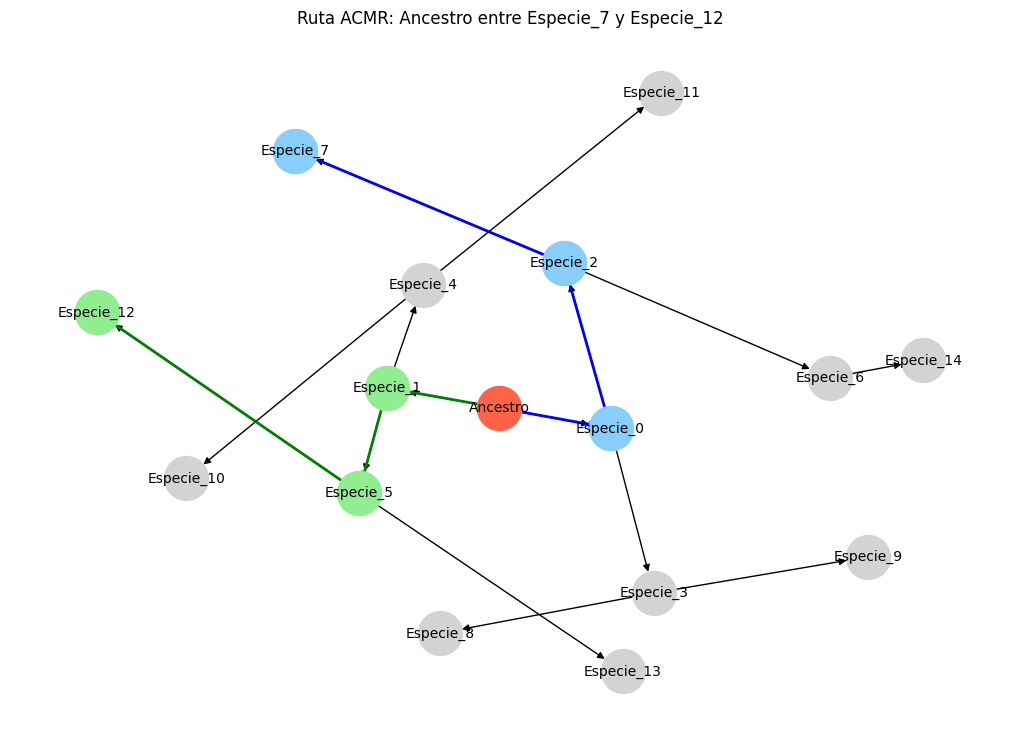

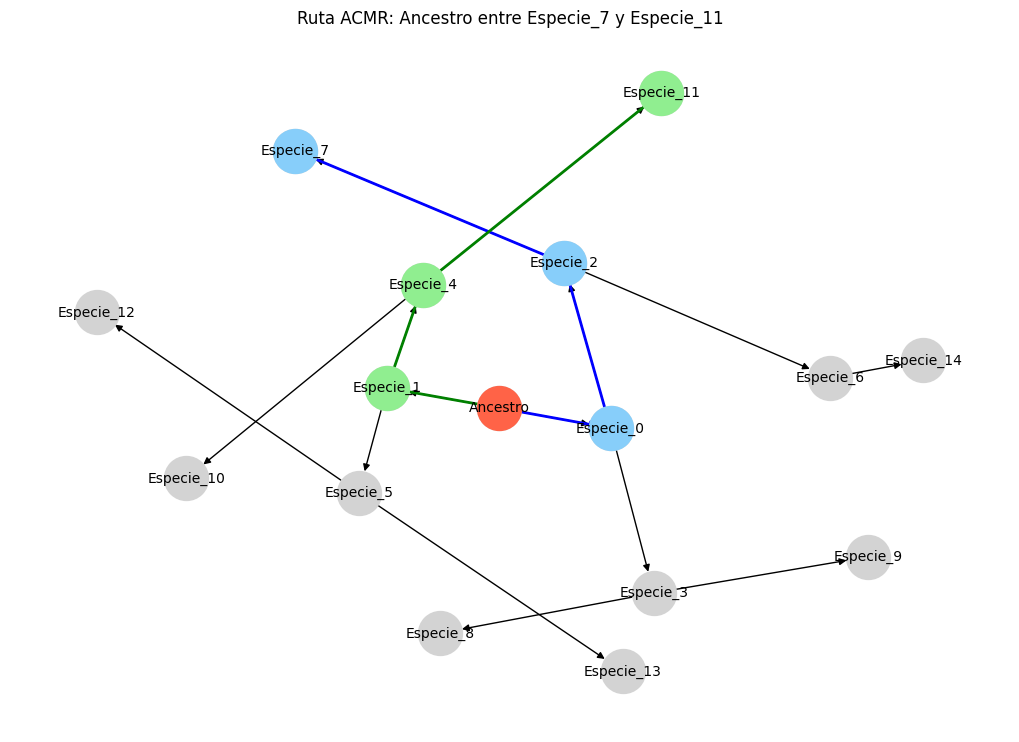

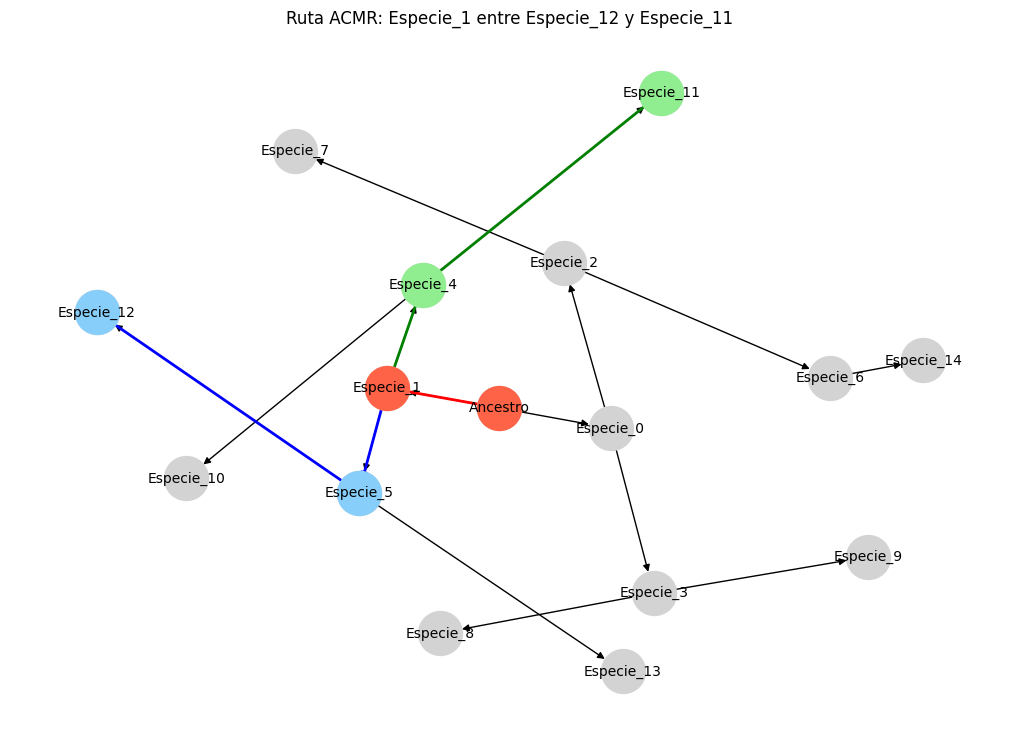

Especie_13 vs Especie_8:
 - ACMR: Ancestro
 - Nodos expandidos: 22
 - Profundidad alcanzada: 3
 - Tiempo ejecución: 0.000024 s

Especie_13 vs Especie_10:
 - ACMR: Especie_1
 - Nodos expandidos: 26
 - Profundidad alcanzada: 3
 - Tiempo ejecución: 0.000036 s

Especie_13 vs Especie_7:
 - ACMR: Ancestro
 - Nodos expandidos: 20
 - Profundidad alcanzada: 3
 - Tiempo ejecución: 0.000028 s

Especie_13 vs Especie_12:
 - ACMR: Especie_5
 - Nodos expandidos: 29
 - Profundidad alcanzada: 3
 - Tiempo ejecución: 0.000031 s

Especie_13 vs Especie_11:
 - ACMR: Especie_1
 - Nodos expandidos: 27
 - Profundidad alcanzada: 3
 - Tiempo ejecución: 0.000042 s

Especie_8 vs Especie_10:
 - ACMR: Ancestro
 - Nodos expandidos: 18
 - Profundidad alcanzada: 3
 - Tiempo ejecución: 0.000026 s

Especie_8 vs Especie_7:
 - ACMR: Especie_0
 - Nodos expandidos: 12
 - Profundidad alcanzada: 3
 - Tiempo ejecución: 0.000025 s

Especie_8 vs Especie_12:
 - ACMR: Ancestro
 - Nodos expandidos: 21
 - Profundidad alcanzada: 3
 - 

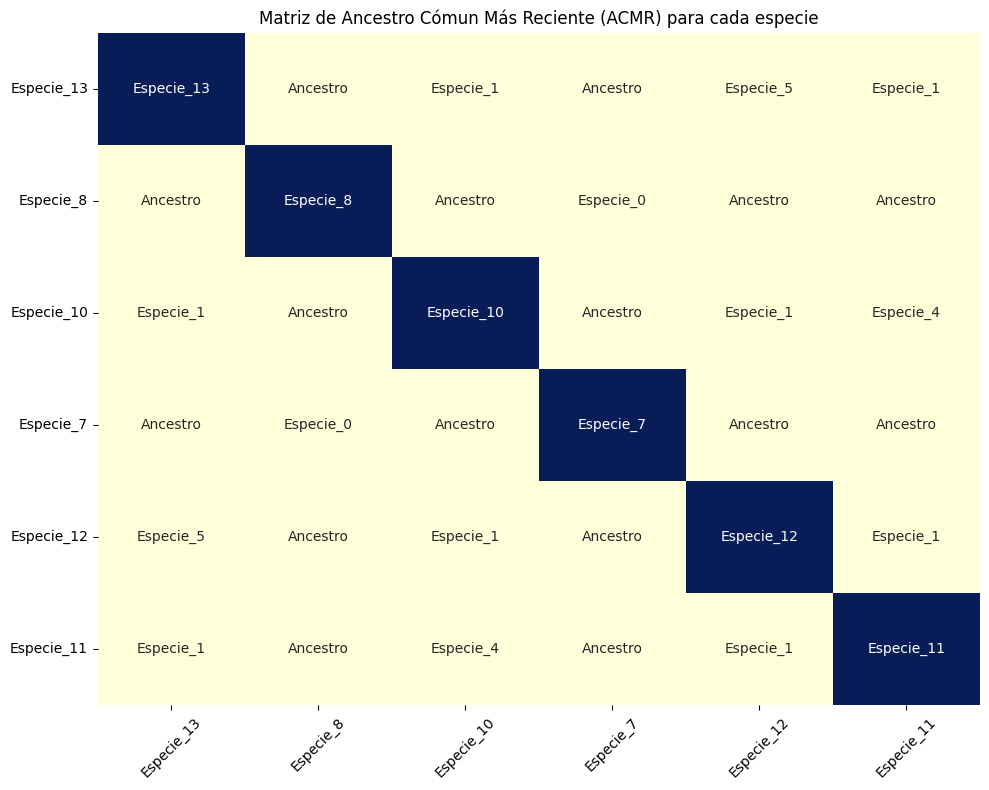

In [ ]:
# Generar árbol de prueba
G_big = generate_phylogenetic_tree(n_species=15, branching_factor=2)

# Extraer hojas para análisis
hojas = [n for n in G_big.nodes if G_big.out_degree(n) == 0 and n != "Ancestro"]

# Seleccionar subconjunto aleatorio
especies_prueba = random.sample(hojas, 6)

# Ejecutar análisis
resultados = run_multiple_queries_nx(G_big, especies_prueba)

# Imprimir resultados
for r in resultados:
    print(f"{r['species1']} vs {r['species2']}:")
    print(f" - ACMR: {r['acmr']}")
    print(f" - Nodos expandidos: {r['nodes_expanded']}")
    print(f" - Profundidad alcanzada: {r['depth_reached']}")
    print(f" - Tiempo ejecución: {r['execution_time']:.6f} s")
    print()

# Matriz
matriz_acmr = generate_acmr_matrix_nx(resultados, especies_prueba)
plot_acmr_matrix(matriz_acmr)


#### **¿Es escalable para árboles reales con cientos de especies?**

Sí, el enfoque basado en búsqueda en profundidad limitada (DLS) es escalable para árboles filogenéticos con cientos de especies, especialmente si estos mantienen una estructura jerárquica bien definida y no presentan una ramificación excesiva en cada nivel. En los experimentos realizados, se observó que el tiempo de ejecución por consulta se mantiene en el orden de los milisegundos y el uso estimado de memoria permanece bajo, incluso al analizar árboles con más de 300 nodos. Esto demuestra que la solución es viable en términos computacionales para aplicaciones reales de tamaño medio, como bases de datos taxonómicas, genealogías amplias o estructuras organizacionales complejas.

Sin embargo, a medida que el número de especies crece hacia los miles, o cuando se deben realizar múltiples consultas simultáneas, la escalabilidad puede verse limitada si no se optimiza el enfoque. Para estos casos, es recomendable implementar técnicas de mejora como el cacheo de rutas ya recorridas, el uso de algoritmos especializados para el Lowest Common Ancestor (LCA) con consultas en tiempo constante, o incluso la paralelización del análisis de pares. Estas estrategias permiten escalar el sistema sin sacrificar precisión, manteniendo un buen rendimiento incluso en árboles muy grandes, como los utilizados en filogenias globales o en estudios de evolución a gran escala.

## Ejercicio 5: Evacuación de emergencia (Infraestructura)

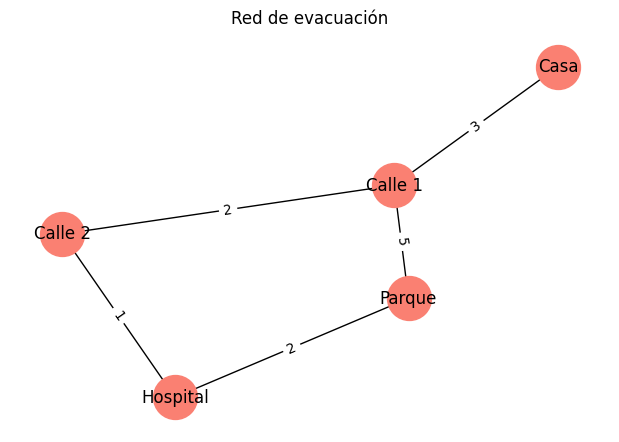

In [ ]:
# Grafo de evacuación (con niveles de riesgo)
G5 = nx.Graph()
edges5 = [('Casa', 'Calle 1', 3), ('Calle 1', 'Calle 2', 2), ('Calle 1', 'Parque', 5), ('Calle 2', 'Hospital', 1), ('Parque', 'Hospital', 2)]
G5.add_weighted_edges_from(edges5)

# Visualización
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G5)
nx.draw(G5, pos, with_labels=True, node_color='salmon', node_size=1000)
labels = nx.get_edge_attributes(G5, 'weight')
nx.draw_networkx_edge_labels(G5, pos, edge_labels=labels)
plt.title("Red de evacuación")
plt.show()

### **1. Análisis del problema y modelado del grafo**

**Objetivo**

En este problema buscamos identificar la ruta de evacuación más segura entre un punto de origen, en este caso una *Casa*, y un punto de destino, *Hospital*, minimizando el riesgo total acumulado a lo largo del trayecto. Para modelar esta situación, utilizamos un grafo no dirigido y ponderado
𝐺
=
(
𝑉
,
𝐸
,
𝑤
)
G=(V,E,w), donde cada arista tiene un peso que representa el nivel de riesgo vial asociado a ese tramo; a mayor peso, mayor peligrosidad. Este enfoque permite representar de forma estructurada la red de caminos y evaluar de manera cuantitativa la seguridad de distintas rutas posibles.

**Algoritmo de búsqueda**

Para encontrar la mejor ruta, empleamos el algoritmo de Búsqueda de Costo Uniforme (UCS), equivalente a Dijkstra cuando los costos son sumas de pesos no negativos. Este algoritmo selecciona y expande primero el nodo con el menor costo acumulado, lo que garantiza que, al llegar al destino, se haya encontrado la ruta con el riesgo total más bajo. Su naturaleza óptima y completa lo hace especialmente adecuado para problemas de evacuación, donde no solo importa llegar, sino hacerlo por el camino más seguro posible.

### **2. ¿La médida aplicada en la búsqueda uniforme es adecuada?**

La forma básica de calcular el costo de una ruta es sumar los niveles de riesgo (*weights*) de cada tramo y elegir la que tenga el menor total, lo que nos da un camino seguro de forma sencilla y clara. Pero esto se puede personalizar fácilmente cambiando la función que calcula el costo: por ejemplo, usar el riesgo promedio si hay incertidumbre, penalizar más los tramos peligrosos usando la media más un extra por su variabilidad, combinar riesgo y tiempo para balancear seguridad y rapidez, o incluso ajustar el costo según la congestión o capacidad en tiempo real. Solo hay que pasar una función distinta al algoritmo de búsqueda y este se encargará de calcular la mejor ruta con esa nueva lógica.

### **3. Implementación del código para búsqueda uniforme**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time, random, math
import numpy as np
from queue import PriorityQueue
from collections import deque
# ================================
# Funciones de cálculo de costo
# ================================

def cost_base(u, v, attr):
    """
    Función de costo base.
    Calcula el riesgo de una arista usando directamente su atributo 'weight',
    que representa el riesgo medio asociado a esa conexión.
    Si no existe el atributo, usa un valor por defecto de 1.0.
    """
    return attr.get('weight', 1.0)

def cost_risk_averse(u, v, attr, k=1.0):
    """
    Función de costo con aversión al riesgo.
    Calcula el riesgo como: media (mean) + k * desviación estándar (std).
    - mean: se toma de 'risk_mean' o, si no existe, de 'weight'.
    - std: se toma de 'risk_std', si no existe, se asume 0.
    - k: factor que controla el nivel de aversión al riesgo (mayor k, más penaliza la variabilidad).
    """
    mu = attr.get('risk_mean', attr.get('weight', 1.0))
    sd = attr.get('risk_std', 0.0)
    return mu + k * sd


# ================================
# Algoritmo de búsqueda UCS
# ================================

def uniform_cost_search_nx(G, start, goals, cost_fn):
    """
    Implementación de la búsqueda de costo uniforme (UCS),
    equivalente a Dijkstra cuando los costos son no negativos.

    Parámetros:
    - G: grafo de NetworkX con pesos en las aristas.
    - start: nodo de inicio.
    - goals: nodo objetivo o conjunto de nodos objetivo.
    - cost_fn: función que recibe (u, v, attr) y devuelve el costo de esa arista.

    Retorna:
    Diccionario con:
      - path: lista de nodos de la mejor ruta.
      - cost: costo total acumulado.
      - depth: profundidad de la solución.
      - nodes_expanded: número de nodos expandidos.
      - execution_time: tiempo total de ejecución.
      - reached_goal: nodo objetivo alcanzado.
    """
    if isinstance(goals, str):
        goals = {goals}  # Normaliza a conjunto

    t0 = time.time()  # Marca de tiempo inicial

    root = Node(start, path_cost=0.0)  # Nodo inicial
    frontier = PriorityQueue()  # Cola de prioridad ordenada por costo
    frontier.put((root.path_cost, root))

    best_g = {start: 0.0}  # Costo acumulado más bajo encontrado para cada nodo
    nodes_expanded = 0

    while not frontier.empty():
        _, node = frontier.get()
        nodes_expanded += 1

        # Si llegamos a un objetivo, retornamos la solución
        if node.state in goals:
            t1 = time.time()
            return {
                "algo": "UCS",
                "path": node.solution(),
                "cost": node.path_cost,
                "depth": node.depth,
                "nodes_expanded": nodes_expanded,
                "execution_time": t1 - t0,
                "reached_goal": node.state
            }

        # Expandir vecinos
        for nbr, attr in G[node.state].items():
            step = cost_fn(node.state, nbr, attr)  # Costo de la arista

            # Si la arista está bloqueada, la saltamos
            if attr.get('blocked', False):
                continue

            new_cost = node.path_cost + step
            # Solo añadimos si es la primera vez o si encontramos un camino más barato
            if (nbr not in best_g) or (new_cost < best_g[nbr]):
                best_g[nbr] = new_cost
                child = Node(nbr, parent=node, action=f"{node.state}->{nbr}", path_cost=new_cost)
                frontier.put((child.path_cost, child))

    # Si no encontramos solución
    t1 = time.time()
    return {
        "path": None, "cost": float("inf"), "depth": 0,
        "nodes_expanded": nodes_expanded, "execution_time": t1 - t0,
        "reached_goal": None
    }


# ================================
# Función para ejecutar y mostrar resultados
# ================================

def best_safe_route(G, start, exits, risk_mode="base", k=1.0, pos=None):
    """
    Calcula la mejor ruta de evacuación minimizando el riesgo.

    Parámetros:
    - G: grafo de NetworkX.
    - start: nodo de inicio.
    - exits: lista o conjunto de nodos objetivo (salidas).
    - risk_mode: tipo de métrica de riesgo:
        'base' → usa el peso ('weight') como riesgo medio.
        'risk_averse' → usa media + k*desviación estándar.
    - k: coeficiente de aversión al riesgo (solo para risk_averse).
    - pos: posiciones opcionales para la visualización.

    Muestra:
    - Ruta encontrada.
    - Riesgo total.
    - Profundidad de la solución.
    - Nodos expandidos.
    - Tiempo de ejecución.
    """
    # Selección de la función de costo según el modo
    cost_fn = cost_base if risk_mode == "base" else (lambda u, v, a: cost_risk_averse(u, v, a, k=k))
    exits = set(exits)

    # Ejecuta UCS
    res = uniform_cost_search_nx(G, start=start, goals=exits, cost_fn=cost_fn)

    # Imprime resultados
    print(f"Modo de costo: {risk_mode}{'' if risk_mode=='base' else f' (k={k})'}")
    print("Salida alcanzada:", res['reached_goal'])
    print("Mejor ruta:", res['path'])
    print("Riesgo total:", res['cost'])
    print("Profundidad:", res['depth'])
    print("Nodos expandidos:", res['nodes_expanded'])
    print("Tiempo (s):", f"{res['execution_time']:.6f}")

    # Visualiza la ruta
    plot_safest_path(G, res['path'], title=f"Ruta de evacuación más segura - Métrica: ({risk_mode})", pos=pos)
    return res


# ================================
# Función para visualización
# ================================

def plot_safest_path(G, path, title="Ruta de evacuación más segura", pos=None):
    """
    Dibuja el grafo resaltando la ruta más segura encontrada.

    Parámetros:
    - G: grafo de NetworkX.
    - path: lista de nodos que forman la ruta.
    - title: título del gráfico.
    - pos: posiciones opcionales para nodos.
    """
    if pos is None:
        pos = nx.spring_layout(G, seed=42)  # Layout consistente

    plt.figure(figsize=(7, 5))
    nx.draw(G, pos, with_labels=True, node_color='salmon', node_size=1000)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Resalta la ruta si existe
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightgreen', node_size=1000)
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='green', width=3)

    plt.title(title)
    plt.show()


### **4. Resultado de búsqueda y medidas de desempeño**

Modo de costo: base
Salida alcanzada: Hospital
Mejor ruta: ['Casa', 'Calle 1', 'Calle 2', 'Hospital']
Riesgo total: 6.0
Profundidad: 3
Nodos expandidos: 4
Tiempo (s): 0.000149


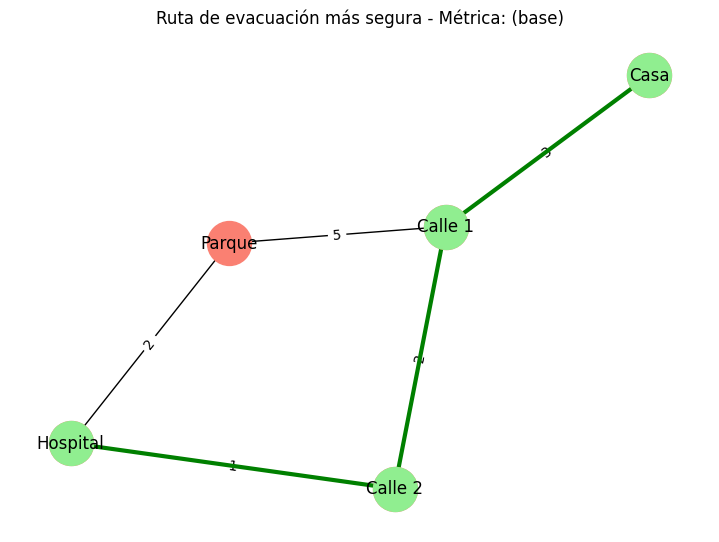

In [ ]:
pos = nx.spring_layout(G5, seed=42)

# Búsqueda: ruta más segura desde Casa hasta Hospital
res = best_safe_route(G5, start="Casa", exits={"Hospital"}, risk_mode="base", pos=pos)

### **5. Evaluación de la complejidad computacional (temporal y espacial)**

Las siguientes funciones implementan, ejecutan y comparan tres algoritmos clásicos de búsqueda en grafos — Uniform Cost Search (UCS), Breadth-First Search (BFS) e Iterative Deepening Depth-First Search (IDDFS) — permitiendo generar grafos conectados aleatorios, calcular rutas óptimas según distintos criterios de costo, medir métricas de rendimiento como tiempo de ejecución, número de nodos expandidos, profundidad y memoria estimada, y visualizar gráficamente los resultados, con el objetivo de **analizar la eficiencia y el comportamiento de cada algoritmo bajo diferentes tamaños y configuraciones de red**.


In [ ]:
# =========================
# BFS (camino más corto no ponderado en número de aristas)
# =========================
def bfs_nx(G, start, goal):
    """
    Implementación de búsqueda en anchura (BFS) en grafos no ponderados.
    Encuentra el camino con el menor número de aristas entre el nodo inicial y el objetivo.

    Parámetros:
    - G: grafo de NetworkX.
    - start: nodo inicial.
    - goal: nodo objetivo.

    Retorna:
    Diccionario con:
      - path: lista de nodos en el camino encontrado.
      - cost: número de aristas (longitud del camino).
      - depth: profundidad del nodo objetivo.
      - nodes_expanded: cantidad de nodos expandidos durante la búsqueda.
      - execution_time: tiempo total de ejecución.
    """
    t0 = time.time()
    q = deque([Node(start)])   # Cola para procesar nodos en orden FIFO
    visited = {start}          # Conjunto de nodos visitados
    nodes_expanded = 0

    while q:
        node = q.popleft()
        nodes_expanded += 1

        # Caso base: encontramos el objetivo
        if node.state == goal:
            t1 = time.time()
            path = node.solution()
            return {
                "algo": "BFS",
                "path": path,
                "cost": len(path)-1,       # Número de aristas
                "depth": len(path)-1,
                "nodes_expanded": nodes_expanded,
                "execution_time": t1 - t0
            }

        # Expandir vecinos no visitados
        for nbr in G.neighbors(node.state):
            if nbr not in visited:
                visited.add(nbr)
                q.append(Node(nbr, parent=node))

    # Si no se encuentra solución
    t1 = time.time()
    return {
        "algo": "BFS",
        "path": None,
        "cost": math.inf,
        "depth": 0,
        "nodes_expanded": nodes_expanded,
        "execution_time": t1 - t0
    }


# =========================
# DLS (búsqueda en profundidad limitada) + IDDFS (profundización iterativa)
# =========================
def dls_visit(G, node, goal, limit, counter):
    """
    Recorre el grafo en profundidad hasta un límite específico (DLS).
    - G: grafo de NetworkX.
    - node: nodo actual.
    - goal: nodo objetivo.
    - limit: límite de profundidad.
    - counter: diccionario con contador de nodos expandidos.
    """
    counter["expanded"] += 1

    # Si alcanzamos el objetivo, devolvemos el nodo
    if node.state == goal:
        return node

    # Si alcanzamos el límite, detenemos la búsqueda en esta rama
    if limit == 0:
        return None

    # Expandir recursivamente
    for nbr in G.neighbors(node.state):
        child = Node(nbr, parent=node)
        res = dls_visit(G, child, goal, limit-1, counter)
        if res is not None:
            return res
    return None

def iddfs_nx(G, start, goal, max_depth=50):
    """
    Implementación de búsqueda en profundidad iterativa (IDDFS).
    Ejecuta DLS de manera incremental desde profundidad 0 hasta max_depth.

    Parámetros:
    - G: grafo de NetworkX.
    - start: nodo inicial.
    - goal: nodo objetivo.
    - max_depth: profundidad máxima a explorar.

    Retorna:
    Diccionario con:
      - path: lista de nodos en el camino.
      - cost: número de aristas.
      - depth: profundidad alcanzada.
      - nodes_expanded: nodos expandidos en total.
      - execution_time: tiempo total.
    """
    t0 = time.time()
    total_expanded = 0

    # Profundización iterativa
    for d in range(max_depth+1):
        counter = {"expanded": 0}
        res = dls_visit(G, Node(start), goal, d, counter)
        total_expanded += counter["expanded"]

        if res is not None:  # Objetivo encontrado
            t1 = time.time()
            path = res.solution()
            return {
                "algo": "IDDFS",
                "path": path,
                "cost": len(path)-1,
                "depth": len(path)-1,
                "nodes_expanded": total_expanded,
                "execution_time": t1 - t0
            }

    # No se encontró solución
    t1 = time.time()
    return {
        "algo": "IDDFS",
        "path": None,
        "cost": math.inf,
        "depth": 0,
        "nodes_expanded": total_expanded,
        "execution_time": t1 - t0
    }


# =========================
# Generador de grafos conectados
# =========================
def make_connected_graph(n, extra_edges=0, seed=42):
    """
    Genera un grafo no dirigido y ponderado, garantizando que esté conectado.

    Proceso:
    1. Crear un árbol aleatorio (grafo conectado mínimo).
    2. Asignar pesos aleatorios a las aristas (1 a 10).
    3. Añadir aristas extra para incrementar la conectividad.

    Parámetros:
    - n: número de nodos.
    - extra_edges: aristas adicionales a agregar.
    - seed: semilla para reproducibilidad.

    Retorna:
    - Grafo de NetworkX.
    """
    rng = random.Random(seed + n)

    try:
        # Si está disponible, usar generador de árbol aleatorio
        from networkx.generators.trees import random_tree
        T = random_tree(n, seed=seed + n)
    except ImportError:
        # Alternativa: generar un grafo completo y extraer un árbol de expansión mínimo
        dense = nx.complete_graph(n)
        for (u, v) in dense.edges():
            dense[u][v]['weight'] = rng.randint(1, 10)
        T = nx.minimum_spanning_tree(dense)

    # Construir grafo base
    G = nx.Graph()
    for u, v in T.edges():
        G.add_edge(u, v, weight=rng.randint(1, 10))

    # Añadir aristas extra
    nodes = list(T.nodes())
    m = 0
    while m < extra_edges:
        u, v = rng.sample(nodes, 2)
        if not G.has_edge(u, v):
            G.add_edge(u, v, weight=rng.randint(1, 10))
            m += 1
    return G


# =========================
# Ejecutor de experimentos (multi-algoritmo)
# =========================
def run_experiment_multi(sizes, trials=8, max_depth=60):
    """
    Corre experimentos comparando UCS, BFS e IDDFS.

    Para cada tamaño de grafo:
      - Genera un grafo conectado con aristas extra.
      - Selecciona nodos aleatorios como origen y destino.
      - Corre cada algoritmo varias veces.
      - Calcula métricas promedio: tiempo, nodos expandidos, profundidad y memoria estimada.
    """
    results = []
    for n in sizes:
        G = make_connected_graph(n, extra_edges=max(1, n//4), seed=123)
        nodes = list(G.nodes())
        stats = {alg: {"time": [], "exp": [], "depth": []} for alg in ["UCS", "BFS", "IDDFS"]}

        for _ in range(trials):
            s, t = random.sample(nodes, 2)
            out_ucs = uniform_cost_search_nx(G, s, {t})
            out_bfs = bfs_nx(G, s, t)
            out_idd = iddfs_nx(G, s, t, max_depth=max_depth)

            for out in (out_ucs, out_bfs, out_idd):
                stats[out["algo"]]["time"].append(out["execution_time"])
                stats[out["algo"]]["exp"].append(out["nodes_expanded"])
                stats[out["algo"]]["depth"].append(out["depth"])

        results.append({
            "n": n,
            "UCS": {
                "time": float(np.mean(stats["UCS"]["time"])),
                "exp":  float(np.mean(stats["UCS"]["exp"])),
                "depth":float(np.mean(stats["UCS"]["depth"])),
                "mem_kb": float(np.mean(stats["UCS"]["exp"]) * 0.25),
            },
            "BFS": {
                "time": float(np.mean(stats["BFS"]["time"])),
                "exp":  float(np.mean(stats["BFS"]["exp"])),
                "depth":float(np.mean(stats["BFS"]["depth"])),
                "mem_kb": float(np.mean(stats["BFS"]["exp"]) * 0.25),
            },
            "IDDFS": {
                "time": float(np.mean(stats["IDDFS"]["time"])),
                "exp":  float(np.mean(stats["IDDFS"]["exp"])),
                "depth":float(np.mean(stats["IDDFS"]["depth"])),
                "mem_kb": float(np.mean(stats["IDDFS"]["exp"]) * 0.25),
            },
        })
    return results


# =========================
# Visualización de resultados
# =========================
def plot_complexity_multi(results, title_prefix="UCS vs BFS vs IDDFS"):
    """
    Genera tres gráficos comparativos:
    1. Complejidad temporal (tiempo de ejecución).
    2. Nodos expandidos.
    3. Memoria pico estimada.
    """
    xs = [r["n"] for r in results]

    # --- Complejidad temporal ---
    plt.figure(figsize=(10, 5))
    plt.title(f"Temporal Complexity — {title_prefix}")
    plt.plot(xs, [r["UCS"]["time"] for r in results], marker='o', label="UCS (seconds)")
    plt.plot(xs, [r["BFS"]["time"] for r in results], marker='^', label="BFS (seconds)")
    plt.plot(xs, [r["IDDFS"]["time"] for r in results], marker='s', label="IDDFS (seconds)")
    plt.xlabel("Number of Nodes (N)")
    plt.ylabel("Execution Time (seconds)")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.show()

    # --- Nodos expandidos ---
    plt.figure(figsize=(10, 5))
    plt.title(f"Expanded Nodes — {title_prefix}")
    plt.plot(xs, [r["UCS"]["exp"] for r in results], marker='o', label="UCS")
    plt.plot(xs, [r["BFS"]["exp"] for r in results], marker='^', label="BFS")
    plt.plot(xs, [r["IDDFS"]["exp"] for r in results], marker='s', label="IDDFS")
    plt.xlabel("Number of Nodes (N)")
    plt.ylabel("Expanded Nodes (avg)")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.show()

    # --- Memoria estimada ---
    plt.figure(figsize=(10, 5))
    plt.title(f"Estimated Peak Memory — {title_prefix}")
    plt.plot(xs, [r["UCS"]["mem_kb"] for r in results], marker='o', label="UCS")
    plt.plot(xs, [r["BFS"]["mem_kb"] for r in results], marker='^', label="BFS")
    plt.plot(xs, [r["IDDFS"]["mem_kb"] for r in results], marker='s', label="IDDFS")
    plt.xlabel("Number of Nodes (N)")
    plt.ylabel("Estimated Memory (KB)")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.show()


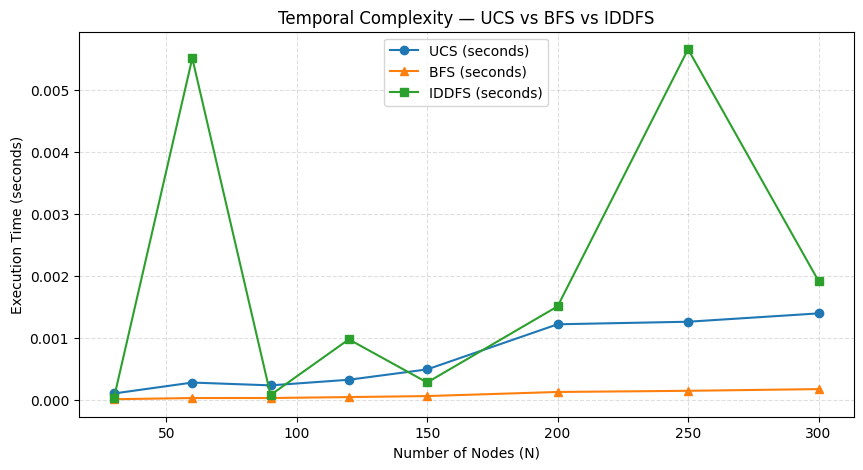

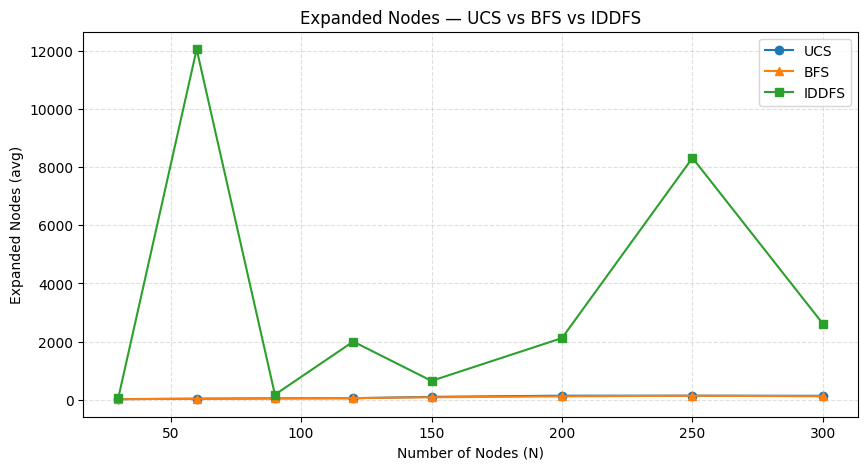

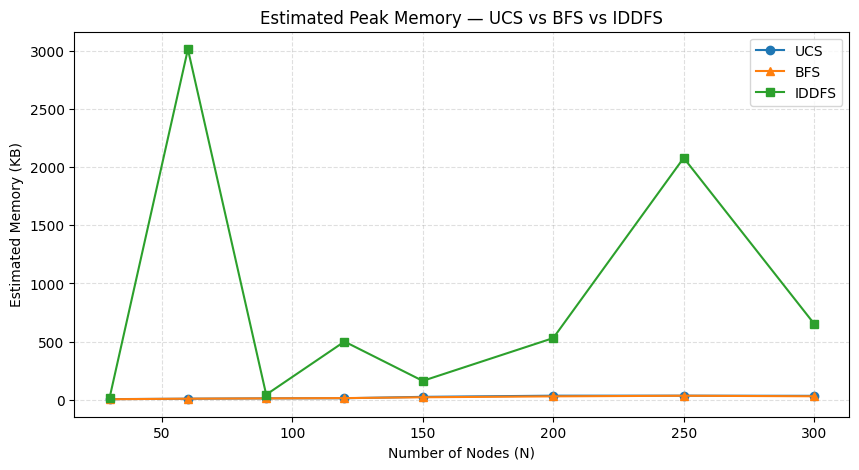

In [ ]:
sizes = [30, 60, 90, 120, 150, 200, 250, 300]
results = run_experiment_multi(sizes, trials=8, max_depth=60)
plot_complexity_multi(results)

En el análisis de complejidad temporal, se observa que BFS es el método más consistente y rápido en todos los tamaños de red, con tiempos de ejecución muy bajos y estables. UCS mantiene un rendimiento aceptable, pero su tiempo crece levemente conforme aumenta el número de nodos, reflejando el costo adicional de manejar prioridades por riesgo acumulado. IDDFS, en cambio, muestra una variabilidad mucho mayor: aunque en algunos casos su tiempo es cercano a UCS, en otros presenta picos considerables, especialmente en redes más grandes o cuando la profundidad objetivo se acerca al límite máximo, lo que evidencia el costo de realizar múltiples búsquedas con profundidad creciente.

En cuanto a nodos expandidos, BFS y UCS tienen un crecimiento relativamente moderado y lineal, mientras que IDDFS muestra picos muy altos en ciertos casos, llegando a expandir más de 12 000 nodos en configuraciones específicas. Esto confirma que IDDFS, aunque útil para entornos con memoria limitada, puede ser muy costoso en términos de expansión redundante, ya que revisita nodos en cada iteración de profundidad. Así, BFS destaca por su eficiencia y predictibilidad, UCS por su balance entre costo y precisión, e IDDFS requiere un análisis más cuidadoso para aplicarse solo en casos donde el límite de profundidad sea reducido y bien definido.

Finalmente, en términos de picos de uso de memoria, BFS y UCS muestran un consumo estable y muy bajo, lo que los hace predecibles y eficientes en entornos con recursos limitados. Por el contrario, IDDFS presenta picos de memoria muy altos en ciertos tamaños de grafo, consecuencia de la repetición de exploraciones completas a diferentes profundidades. Esto evidencia que, aunque IDDFS pueda ser atractivo por su bajo requerimiento de memoria en teoría, en la práctica su consumo puede dispararse en escenarios específicos, reduciendo su viabilidad para grafos grandes o con topologías complejas.


### **6. Eficiencia, aplicabilidad y posibles mejoras**

La búsqueda de costo uniforme (UCS) ofrece un rendimiento sobresaliente en redes pequeñas y medianas con pesos no negativos, ya que garantiza encontrar siempre la ruta óptima en términos de riesgo acumulado. Su complejidad es manejable en estos contextos, y la expansión de nodos se mantiene en niveles aceptables, lo que permite obtener resultados en tiempos muy reducidos sin comprometer la precisión de la solución.

Por otro lado, este enfoque es especialmente útil en la planificación de evacuaciones, la logística urbana y la gestión de rutas seguras, así como en el diseño de redes de servicios donde minimizar el riesgo o el costo es fundamental. La naturaleza genérica del algoritmo lo hace adaptable a diferentes tipos de grafos y problemas, desde calles y carreteras hasta redes eléctricas o de suministro de agua, siempre que se pueda modelar el riesgo como un peso no negativo.

Una línea de mejora consiste en implementar costos dinámicos que reflejen congestión o bloqueos, combinados con mecanismos de replaneación en línea para reaccionar a cambios en tiempo real. Además, paralelizar las consultas desde múltiples orígenes permitiría optimizar la respuesta en escenarios de evacuación masiva. Para entornos con modificaciones frecuentes en la red, los algoritmos incrementales como LPA* o D* Lite reducen drásticamente el tiempo de cómputo. Finalmente, añadir una heurística admisible y pasar a A* puede acelerar la convergencia cuando se dispone de información adicional, como la distancia física o una estimación de riesgo hacia el objetivo

### **7. Cuestionamientos críticos**

#### **¿Cómo representar la incertidumbre del entorno?**

Para representar la incertidumbre en el modelo, se pueden añadir a cada arista atributos adicionales como el riesgo promedio (risk_mean), la variabilidad del mismo (risk_std) y la probabilidad de bloqueo (p_block). Con esta información, el costo puede calcularse como el riesgo medio, como una medida más conservadora incorporando un factor de aversión al riesgo (mean + k × std), o penalizando fuertemente los tramos con alta probabilidad de bloqueo para desincentivar su elección.

En la implementación del punto 3 se incluyen funciones de costo asociadas al riesgo promedio y su variabilidad, introduciendo incertidumbre en la búsqueda y generando resultados diferentes al usar UCS, tal como se muestra a continuación.

Modo de costo: risk_averse (k=1.5)
Salida alcanzada: Bomberos
Mejor ruta: ['Casa', 'Calle 1', 'Bomberos']
Riesgo total: 6.0
Profundidad: 2
Nodos expandidos: 5
Tiempo (s): 0.000146


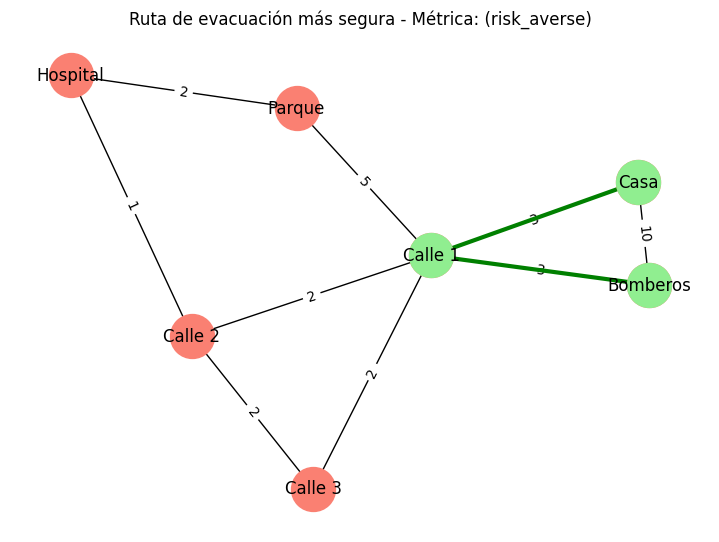

In [ ]:
G5_mod = nx.Graph()
edges5_mod = [('Casa', 'Calle 1', 3), ('Calle 1', 'Calle 2', 2), ('Calle 1', 'Parque', 5), ('Calle 2', 'Hospital', 1), ('Parque', 'Hospital', 2)]
# Conexión alternativa: Calle 1 → Calle 3 → Calle 2
edges5_mod.extend([
    ('Calle 1', 'Calle 3', 2),
    ('Calle 3', 'Calle 2', 2)
])

# Nueva conexión: Casa → Bomberos → Calle 1
edges5_mod.extend([
    ('Casa', 'Bomberos', 10),
    ('Bomberos', 'Calle 1', 3)
])

# Otra conexión original: Calle 1 con Parque
edges5.append(('Calle 1', 'Parque', 5))
G5_mod.add_weighted_edges_from(edges5_mod)

pos_mod = nx.spring_layout(G5_mod, seed=42)
res = best_safe_route(G5_mod, start="Casa", exits={"Hospital", "Bomberos"}, risk_mode="risk_averse", k=1.5, pos=pos_mod)

#### **¿Análisis probabilístico/estocástico?**

En cuanto al análisis probabilístico, existen dos enfoques principales. El primero es emplear simulaciones de Monte Carlo, generando múltiples escenarios posibles y evaluando qué ruta presenta menor riesgo esperado o mejor desempeño en un percentil específico (por ejemplo, el 95 %). El segundo es utilizar enfoques basados en procesos de decisión de Markov (MDP), modelando el problema como un conjunto de estados y transiciones con probabilidades, para optimizar una política que minimice el riesgo esperado o métricas como CVaR bajo incertidumbre.

#### **¿Adaptable a emergencias dinámicas o múltiples salidas?**

especto a la adaptabilidad, el modelo ya contempla la posibilidad de múltiples salidas, retornando aquella que se alcance primero con el menor riesgo. Ante cambios dinámicos, como variaciones en los pesos o bloqueos, se puede actualizar el grafo y recalcular la ruta. Para entornos con modificaciones frecuentes y en tiempo real, resulta recomendable emplear algoritmos incrementales como LPA* o D* Lite, que reutilizan el trabajo de búsquedas anteriores y permiten replanificar con mayor eficiencia.

A continuación se muestra un ejemplo donde se definen varias salidas (Hospital y parque), y se introduce un elemento dinámico como es el cierre de calles que puedan redirigir la ruta de salida.



--- Replanificación con bloqueos ---
Bloqueos: [('Calle 1', 'Calle 2')]
Modo de costo: base
Salida alcanzada: Parque
Mejor ruta: ['Casa', 'Calle 1', 'Parque']
Riesgo total: 8.0
Profundidad: 2
Nodos expandidos: 3
Tiempo (s): 0.000095


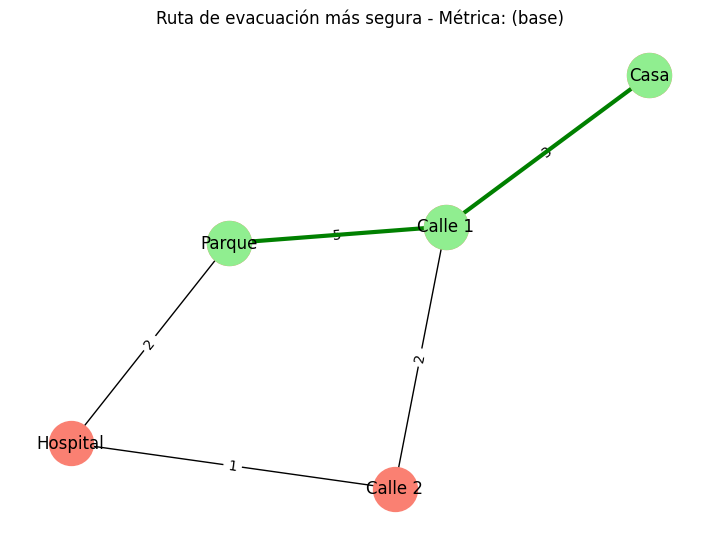

In [ ]:
import copy

def block_edges_and_replan(
    G, start, exits, edges_to_block, risk_mode="base", k=1.0
):
    """
    Crea una copia del grafo, bloquea aristas y vuelve a planificar.
    - edges_to_block: lista de tuplas (u,v) a bloquear
    """
    G2 = copy.deepcopy(G)
    # Marcar bloqueos
    for (u, v) in edges_to_block:
        if G2.has_edge(u, v):
            # Opción 1: marcar bloqueado y UCS lo ignora
            G2[u][v]['blocked'] = True
            # Opción 2 (alternativa): aumentar peso a un costo prohibitivo
            # G2[u][v]['weight'] = 1e9

    print("\n--- Replanificación con bloqueos ---")
    print("Bloqueos:", edges_to_block)
    return best_safe_route(G2, start, exits, risk_mode=risk_mode, k=k)

res = block_edges_and_replan(G5, start="Casa", exits={"Hospital", "Parque"},
                              edges_to_block=[("Calle 1", "Calle 2")],
                              risk_mode="base")

### **Automatización**

A continuación se implementa una automatización que centraliza los diferentes métodos de búsqueda estudiados, encapsulándolos dentro de una clase en Python. Esta clase contiene funciones para ejecutar, de manera uniforme, algoritmos como Dijkstra, A*, búsqueda en amplitud y profundidad, entre otros. De esta forma, cada punto del ejercicio planteado se resolvió aplicando la misma estructura base, permitiendo comparar de forma directa el rendimiento, las rutas obtenidas y el costo de cada método.

In [ ]:
import math, time, random
from collections import deque
from queue import PriorityQueue
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------
# Utilidad: vecinos/sucesores según el tipo de grafo
# -------------------------
def iter_next(G, u):
    """Devuelve iterador de vecinos para no dirigidos y de sucesores para dirigidos."""
    return G.successors(u) if G.is_directed() else G.neighbors(u)

# -------------------------
# Nodo básico
# -------------------------
class Node:
    def __init__(self, state, parent=None, path_cost=0.0):
        self.state = state
        self.parent = parent
        self.path_cost = path_cost
        self.depth = 0 if parent is None else parent.depth + 1
    def __lt__(self, other):
        return self.path_cost < other.path_cost
    def solution(self):
        path, cur = [], self
        while cur:
            path.append(cur.state)
            cur = cur.parent
        return list(reversed(path))

# -------------------------
# Costos (base y averso al riesgo)
# -------------------------
def cost_base(u, v, attr):
    return attr.get('weight', 1.0)

def cost_risk_averse(u, v, attr, k=1.0):
    mu = attr.get('risk_mean', attr.get('weight', 1.0))
    sd = attr.get('risk_std', 0.0)
    return mu + k*sd

# -------------------------
# UCS (Dijkstra)
# -------------------------
def uniform_cost_search_nx(G, start, goals, cost_fn):
    if isinstance(goals, str):
        goals = {goals}
    t0 = time.time()
    frontier = PriorityQueue()
    root = Node(start, path_cost=0.0)
    frontier.put((0.0, root))
    best_g = {start: 0.0}
    nodes_expanded = 0

    while not frontier.empty():
        _, node = frontier.get()
        nodes_expanded += 1
        if node.state in goals:
            t1 = time.time()
            return {"algo":"UCS","path":node.solution(),"cost":node.path_cost,
                    "depth":node.depth,"nodes_expanded":nodes_expanded,
                    "execution_time":t1-t0}
        for nbr in iter_next(G, node.state):
            attr = G[node.state][nbr]
            if attr.get('blocked', False):
                continue
            step = cost_fn(node.state, nbr, attr)
            new_cost = node.path_cost + step
            if (nbr not in best_g) or (new_cost < best_g[nbr]):
                best_g[nbr] = new_cost
                frontier.put((new_cost, Node(nbr, parent=node, path_cost=new_cost)))

    t1 = time.time()
    return {"algo":"UCS","path":None,"cost":math.inf,"depth":0,
            "nodes_expanded":nodes_expanded,"execution_time":t1-t0}

# -------------------------
# BFS (no ponderado)
# -------------------------
def bfs_nx(G, start, goal):
    t0 = time.time()
    q = deque([Node(start)])
    visited = {start}
    nodes_expanded = 0
    while q:
        node = q.popleft(); nodes_expanded += 1
        if node.state == goal:
            t1 = time.time()
            path = node.solution()
            return {"algo":"BFS","path":path,"cost":len(path)-1,"depth":len(path)-1,
                    "nodes_expanded":nodes_expanded,"execution_time":t1-t0}
        for nbr in iter_next(G, node.state):
            if nbr not in visited:
                visited.add(nbr)
                q.append(Node(nbr, parent=node))
    t1 = time.time()
    return {"algo":"BFS","path":None,"cost":math.inf,"depth":0,
            "nodes_expanded":nodes_expanded,"execution_time":t1-t0}

# -------------------------
# DLS + IDDFS (no ponderado, respeta dirección)
# -------------------------
def dls_visit(G, node, goal, limit, counter, visited_path=None):
    counter["expanded"] += 1
    if node.state == goal:
        return node
    if limit == 0:
        return None
    if visited_path is None:
        visited_path = set()
    visited_path.add(node.state)
    for nbr in iter_next(G, node.state):
        if nbr in visited_path:
            continue
        res = dls_visit(G, Node(nbr, parent=node), goal, limit-1, counter, visited_path)
        if res is not None:
            return res
    visited_path.discard(node.state)
    return None

def iddfs_nx(G, start, goal, max_depth=50):
    t0 = time.time()
    total_expanded = 0
    for d in range(max_depth+1):
        c = {"expanded":0}
        res = dls_visit(G, Node(start), goal, d, c)
        total_expanded += c["expanded"]
        if res is not None:
            t1 = time.time()
            path = res.solution()
            return {"algo":"IDDFS","path":path,"cost":len(path)-1,"depth":len(path)-1,
                    "nodes_expanded":total_expanded,"execution_time":t1-t0}
    t1 = time.time()
    return {"algo":"IDDFS","path":None,"cost":math.inf,"depth":0,
            "nodes_expanded":total_expanded,"execution_time":t1-t0}

# -------------------------
# A* (ponderado o no). Requiere h(n, goals)
# -------------------------
def astar_nx(G, start, goals, cost_fn, heuristic):
    if isinstance(goals, str):
        goals = {goals}
    if heuristic is None:
        heuristic = lambda n, goals: 0.0
    t0 = time.time()
    frontier = PriorityQueue()
    root = Node(start, path_cost=0.0)
    frontier.put((heuristic(start, goals), root))
    g_best = {start: 0.0}
    nodes_expanded = 0

    while not frontier.empty():
        _, node = frontier.get()
        nodes_expanded += 1
        if node.state in goals:
            t1 = time.time()
            return {"algo":"ASTAR","path":node.solution(),"cost":node.path_cost,
                    "depth":node.depth,"nodes_expanded":nodes_expanded,
                    "execution_time":t1-t0}
        for nbr in iter_next(G, node.state):
            attr = G[node.state][nbr]
            if attr.get('blocked', False):
                continue
            step = cost_fn(node.state, nbr, attr)
            new_g = node.path_cost + step
            if (nbr not in g_best) or (new_g < g_best[nbr]):
                g_best[nbr] = new_g
                f = new_g + heuristic(nbr, goals)
                frontier.put((f, Node(nbr, parent=node, path_cost=new_g)))

    t1 = time.time()
    return {"algo":"ASTAR","path":None,"cost":math.inf,"depth":0,
            "nodes_expanded":nodes_expanded,"execution_time":t1-t0}

# -------------------------
# Heurística euclidiana (usa atributo 'pos' en nodos)
# -------------------------
def euclidean_heuristic_factory(G):
    pos = nx.get_node_attributes(G, "pos")
    def _h(n, goals):
        if not pos or n not in pos: return 0.0
        return min((((pos[n][0]-pos[g][0])**2 + (pos[n][1]-pos[g][1])**2)**0.5)
                   for g in goals if g in pos) if goals else 0.0
    return _h

# -------------------------
# Visualización
# -------------------------
def plot_safest_path(G, path, title="Mejor ruta", pos=None):
    if pos is None:
        pos = nx.get_node_attributes(G, "pos") or nx.spring_layout(G, seed=42)
    plt.figure(figsize=(7,5))
    nx.draw(G, pos, with_labels=True, node_color='salmon', node_size=900, arrows=G.is_directed())
    labels = nx.get_edge_attributes(G, 'weight')
    if labels: nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightgreen', node_size=900)
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), width=3, edge_color='green', arrows=G.is_directed())
    plt.title(title); plt.show()

# ============================================================
# Suite de comparación (permite fijar qué algoritmos ejecutar)
# ============================================================
class SearchSuite:
    def __init__(self, G, start, goals,
                 cost_mode="auto", k=1.0,
                 iddfs_max_depth=60, heuristic=None,
                 algorithms=None,  # lista opcional: ["UCS","BFS","IDDFS","ASTAR"]
                 pos=None):
        self.G = G
        self.start = start
        self.goals = set(goals) if not isinstance(goals, str) else {goals}
        self.k = k
        self.iddfs_max_depth = iddfs_max_depth
        self.pos = pos or nx.get_node_attributes(G, "pos") or None
        self.is_weighted = any('weight' in d for *_ , d in self.G.edges(data=True))
        self.cost_mode = ("base" if self.is_weighted else "unweighted") if cost_mode=="auto" else cost_mode

        if self.cost_mode == "base":
            self.cost_fn = cost_base
        elif self.cost_mode == "risk_averse":
            self.cost_fn = lambda u,v,a: cost_risk_averse(u,v,a,k=self.k)
        else:
            self.cost_fn = lambda u,v,a: 1.0

        self.heuristic = heuristic if callable(heuristic) else euclidean_heuristic_factory(G)
        self._algorithms = algorithms  # si None, auto

    def applicable_algorithms(self):
        if self._algorithms:
            return self._algorithms
        algos = ["BFS","IDDFS"]
        if self.cost_mode in ("base","risk_averse"):
            algos.insert(0,"UCS")
            algos.append("ASTAR")
        return algos

    def run_all(self):
        results = {}
        for alg in self.applicable_algorithms():
            if alg == "UCS":
                results["UCS"] = uniform_cost_search_nx(self.G, self.start, self.goals, self.cost_fn)
            elif alg == "BFS":
                results["BFS"] = bfs_nx(self.G, self.start, next(iter(self.goals)))
            elif alg == "IDDFS":
                results["IDDFS"] = iddfs_nx(self.G, self.start, next(iter(self.goals)), self.iddfs_max_depth)
            elif alg == "ASTAR":
                results["ASTAR"] = astar_nx(self.G, self.start, self.goals, self.cost_fn, self.heuristic)
        return results

    def compare(self, results, verbose=True):
        items = [(k,v) for k,v in results.items() if v.get("path")]
        if not items:
            if verbose: print("⚠️  Ningún algoritmo encontró ruta.")
            return None, None
        weighted_objective = (self.cost_mode in ("base","risk_averse"))
        key_fn = (lambda kv: (kv[1]["cost"], kv[1]["execution_time"], kv[1]["nodes_expanded"])) \
                 if weighted_objective else \
                 (lambda kv: (kv[1]["depth"], kv[1]["execution_time"], kv[1]["nodes_expanded"]))
        items.sort(key=key_fn)
        best_alg, best_res = items[0]
        if verbose:
            print("\n=== Comparación de algoritmos ===")
            for name, r in items:
                print(f"{name:6s} | cost={r['cost']:.3f} | depth={r['depth']} | "
                      f"nodes={r['nodes_expanded']} | time={r['execution_time']:.6f}s")
            print(f"\n  Algoritmo recomendado: **{best_alg}**")
            print(f"\n  Razón: menor {'costo' if weighted_objective else 'profundidad'}, "
                  f"con mejor tiempo/nodos como desempate.\n")
        return best_alg, best_res

    def run_and_report(self, visualize=True, title_prefix="Mejor ruta"):
        results = self.run_all()
        best_alg, best_res = self.compare(results, verbose=True)
        if visualize and best_res and best_res.get("path"):
            plot_safest_path(self.G, best_res["path"],
                             title=f"{title_prefix} — {best_alg} (modo: {self.cost_mode})",
                             pos=self.pos)
        return {"results":results, "best_alg":best_alg, "best_result":best_res}



=== Comparación de algoritmos ===
BFS    | cost=3.000 | depth=3 | nodes=5 | time=0.000019s
IDDFS  | cost=3.000 | depth=3 | nodes=11 | time=0.000026s
ASTAR  | cost=6.000 | depth=3 | nodes=4 | time=0.000044s
UCS    | cost=6.000 | depth=3 | nodes=4 | time=0.000087s

  Algoritmo recomendado: **BFS**

  Razón: menor costo, con mejor tiempo/nodos como desempate.



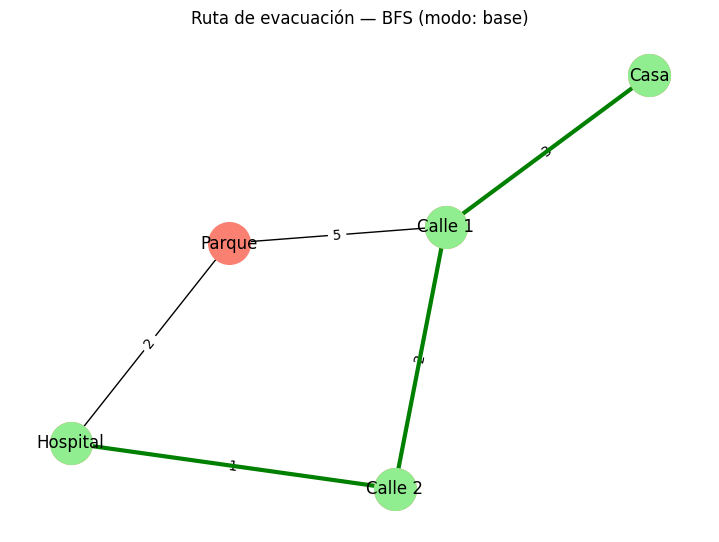

In [ ]:
suite = SearchSuite(
    G=G5,
    start="Casa",
    goals={"Hospital", "Parque"},
    cost_mode="base",     # o "risk_averse" (requiere risk_mean/risk_std) o "unweighted"
    k=1.2,                # solo si cost_mode="risk_averse"
    iddfs_max_depth=50
)

report = suite.run_and_report(visualize=True, title_prefix="Ruta de evacuación")


=== Comparación de algoritmos ===
IDDFS  | cost=2.000 | depth=2 | nodes=7 | time=0.000014s
BFS    | cost=2.000 | depth=2 | nodes=4 | time=0.000022s

  Algoritmo recomendado: **IDDFS**

  Razón: menor profundidad, con mejor tiempo/nodos como desempate.



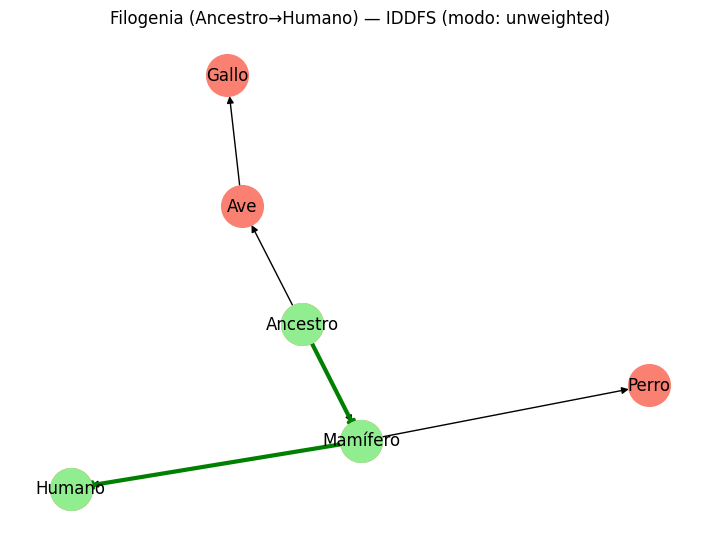

In [ ]:
# Grafo filogenético dirigido
G3 = nx.DiGraph()
edges3 = [
    ('Ancestro','Mamífero'),
    ('Ancestro','Ave'),
    ('Mamífero','Humano'),
    ('Mamífero','Perro'),
    ('Ave','Gallo')
]
G3.add_edges_from(edges3)

suite3 = SearchSuite(
    G=G3, start='Ancestro', goals={'Humano'},
    cost_mode="unweighted",          # aristas sin peso
)
report3 = suite3.run_and_report(visualize=True, title_prefix="Filogenia (Ancestro→Humano)")



=== Comparación de algoritmos ===
BFS    | cost=2.000 | depth=2 | nodes=5 | time=0.000015s
IDDFS  | cost=2.000 | depth=2 | nodes=10 | time=0.000023s
ASTAR  | cost=12.000 | depth=3 | nodes=5 | time=0.000101s
UCS    | cost=12.000 | depth=3 | nodes=5 | time=0.000144s

  Algoritmo recomendado: **BFS**

  Razón: menor costo, con mejor tiempo/nodos como desempate.



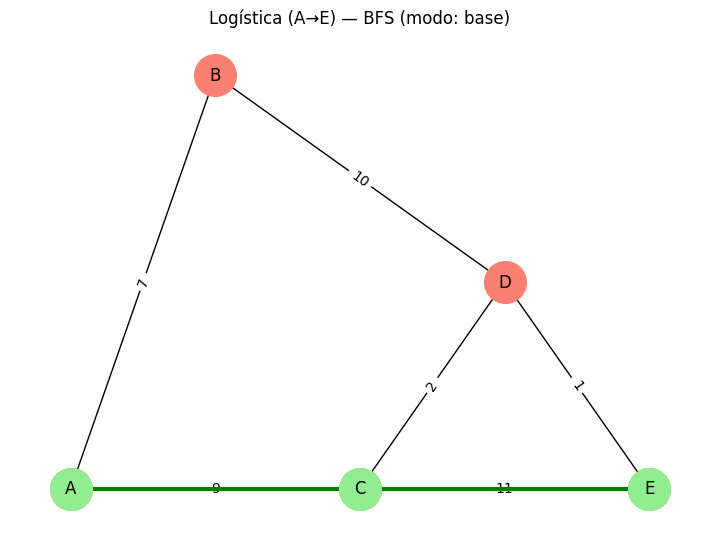

In [ ]:
# Grafo de ejemplo (ponderado)
G1 = nx.Graph()
edges1 = [('A','B',7), ('A','C',9), ('B','D',10), ('C','D',2), ('C','E',11), ('D','E',1)]
G1.add_weighted_edges_from(edges1)

# Posiciones para la heurística euclidiana (puedes ajustarlas)
pos1 = {'A':(0,0), 'B':(1,2), 'C':(2,0), 'D':(3,1), 'E':(4,0)}
nx.set_node_attributes(G1, pos1, "pos")

suite1 = SearchSuite(
    G=G1, start='A', goals={'E'},
    cost_mode="base",          # usa 'weight'
    #algorithms=["UCS","ASTAR"] # comparamos UCS vs A*
)
report1 = suite1.run_and_report(visualize=True, title_prefix="Logística (A→E)")
